# 🔍 Exploratory Data Analysis (EDA)

# 📊 Структура датасета

| Column Name | Description |
|-------------|-------------|
| personality_type | Целевая переменная: Introvert, Extrovert или Ambivert |
| social_energy | Склонность получать энергию от общения (0–10) |
| alone_time_preference | Комфорт при одиночестве |
| talkativeness | Склонность к разговорам |
| deep_reflection | Частота глубоких размышлений |
| group_comfort | Легкость в групповой среде |
| party_liking | Удовольствие от вечеринок и мероприятий |
| listening_skill | Навык активного слушания |
| empathy | Способность понимать эмоции других |
| creativity | Склонность к креативному мышлению |
| organization | Предпочтение порядка, структуры и планирования |
| leadership | Комфорт в роли лидера |
| risk_taking | Готовность идти на риск |
| public_speaking_comfort | Комфорт при публичных выступлениях |
| curiosity | Интерес к обучению и исследованиям |
| routine_preference | Предпочтение рутины или спонтанности |
| excitement_seeking | Жажда новых и ярких впечатлений |
| friendliness | Дружелюбие и общительность |
| emotional_stability | Способность сохранять спокойствие в стрессе |
| planning | Склонность к планированию |
| spontaneity | Склонность к импульсивным действиям |
| adventurousness | Готовность пробовать новое и рискованное |
| reading_habit | Частота чтения книг и статей |
| sports_interest | Интерес к спорту и физической активности |
| online_social_usage | Время, проведенное в соцсетях и онлайн |
| travel_desire | Интерес к путешествиям и новым местам |
| gadget_usage | Частота использования гаджетов и техники |
| work_style_collaborative | Предпочтение командной или индивидуальной работы |
| decision_speed | Скорость принятия решений |
| stress_handling | Способность эффективно справляться со стрессом |

In [5]:
# Imports
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
import plotly.express as px 
pd.set_option("display.max_columns",None)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


ROOT = Path.cwd().parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.data_loader import load_raw_data

In [6]:
# Path to save figures
PROJECT_ROOT = Path.cwd().parent
FIGURES_DIR = PROJECT_ROOT / "reports" / "figures"
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [7]:
# Load data in DataFrame
df = load_raw_data()

In [8]:
# First 5 rows
df.head(5)

personality_type  social_energy  alone_time_preference  talkativeness  \
0        Extrovert       6.794295               3.854670       8.725446   
1         Ambivert       6.378988               5.731157       7.029529   
2         Ambivert       7.459421               6.322263       3.922269   
3        Extrovert       6.159626               3.097837       6.019093   
4        Introvert       5.568462               6.986722       3.913240   

   deep_reflection  group_comfort  party_liking  listening_skill   empathy  \
0         2.515151       7.097368      8.588762         6.774799  6.430132   
1         7.274493       4.111199      3.258248         5.550909  3.958179   
2         4.622261       5.343276      7.452152         9.483990  6.127654   
3         1.965440       7.837140     10.000000         9.436733  8.949684   
4         9.926161       1.650483      0.362298         7.470387  6.756837   

   creativity  organization  leadership  risk_taking  public_speaking_comfort  \
0    6.142968      0.000000    8.486191     6.888588                 8.618033   
1    6.149457      4.530322    6.214742     4.877224                 5.018526   
2    7.032017      7.092078    3.034192     4.312376                 6.474164   
3    8.923875      5.232694   10.000000     8.203100                 7.269755   
4    9.507803      6.378051    4.452973     2.456879                 2.779744   

   curiosity  routine_preference  excitement_seeking  friendliness  \
0   5.514367            4.247436            8.916668      8.370776   
1   6.170892            6.304219            6.494122      9.127521   
2   6.179085            4.930449            4.054730      7.602897   
3   5.477594            2.284054            9.442942     10.000000   
4   5.138220            7.043162            4.149461      4.628954   

   emotional_stability  planning  spontaneity  adventurousness  reading_habit  \
0             4.919931  4.426422     4.853313         8.257134       5.270555   
1             4.585075  4.604019     6.067201         6.289347       5.753165   
2             5.651975  6.269467     5.524244         9.238784       5.250405   
3             6.622884  5.566069     4.327018         8.489791       5.312617   
4             5.283958  4.711944     5.187689         3.167217       7.060235   

   sports_interest  online_social_usage  travel_desire  gadget_usage  \
0        10.000000             9.154296       4.816422      9.191711   
1         5.334303             4.683781       4.725666      5.956141   
2         3.153540             5.000338       6.139166      6.033048   
3         8.379936             7.601946       6.370056      5.410145   
4         2.333388             7.771569       5.534336      5.704598   

   work_style_collaborative  decision_speed  stress_handling  
0                  8.313590        8.032376         7.176905  
1                  5.890619        3.158988         3.423577  
2                  5.807500        4.571003         5.647480  
3                  6.671781        6.600233         5.870088  
4                  5.832968        5.813099         3.758084

In [9]:
# Base information about dataset
print("Dataset shape: ", df.shape)
print("=" * 40)
print("Missing values total: ", df.isnull().sum().sum())
print("=" * 40)
print("Duplicated values total: ", df.duplicated().sum())
print("=" * 40)
print("Data types: ", df.dtypes.unique())


Dataset shape:  (20000, 30)
Missing values total:  0
Duplicated values total:  0
Data types:  [dtype('O') dtype('float64')]


##  Проблем с данными не обнаружено пропуски и дубликаты отсутвуют. Типы данных коректны.



# 📈 Визуализация данных

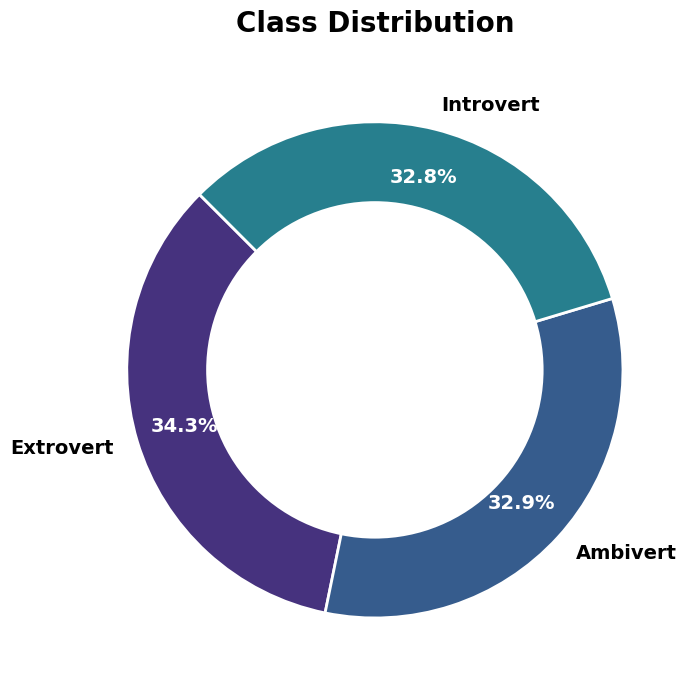

In [10]:

plt.figure(figsize=(10, 7))

personality_counts = df["personality_type"].value_counts()
labels = personality_counts.index
sizes = personality_counts.values
colors = sns.color_palette("viridis")[0:len(labels)]

wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct="%1.1f%%", 
    startangle=135, 
    colors=colors,
    pctdistance=0.8, 
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'w', 'linewidth': 2}
)

plt.setp(texts, fontweight='bold')
plt.setp(autotexts, color='white', fontweight='bold')
plt.title("Class Distribution", fontsize=20, fontweight='bold', pad=20)
centre_circle = plt.Circle((0,0),0.68,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "pieplot_class_distribution.png", dpi=300, bbox_inches='tight')
plt.show()




## Классы сбалонсированы


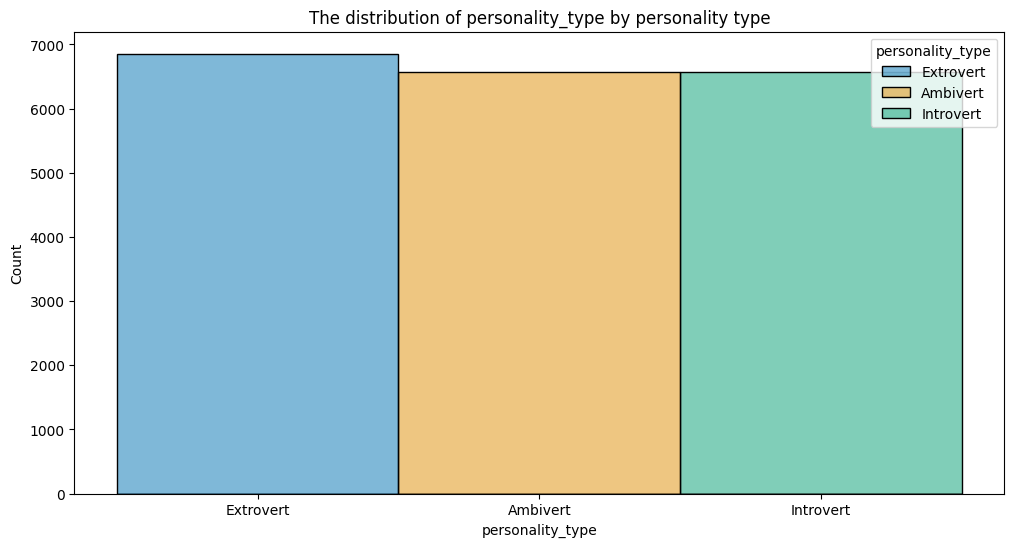

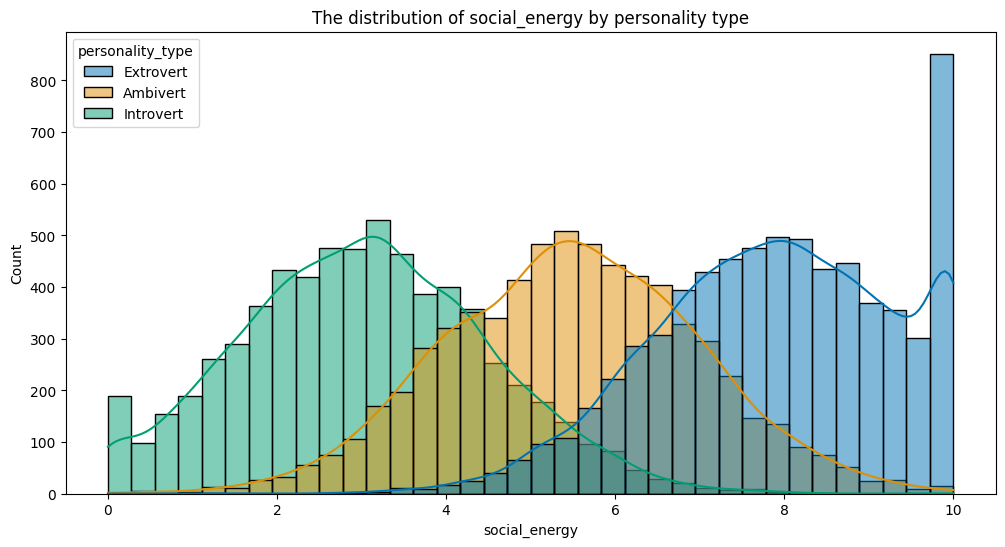

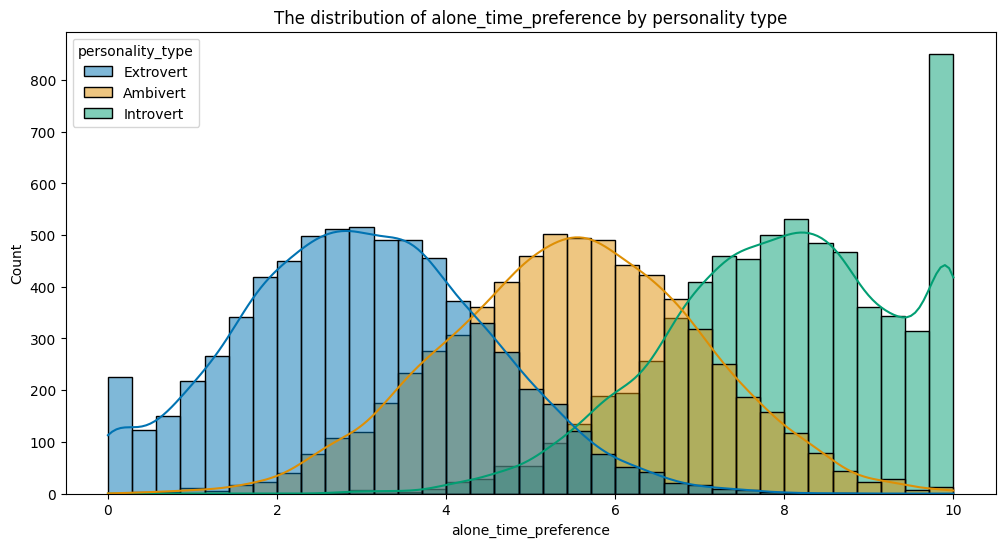

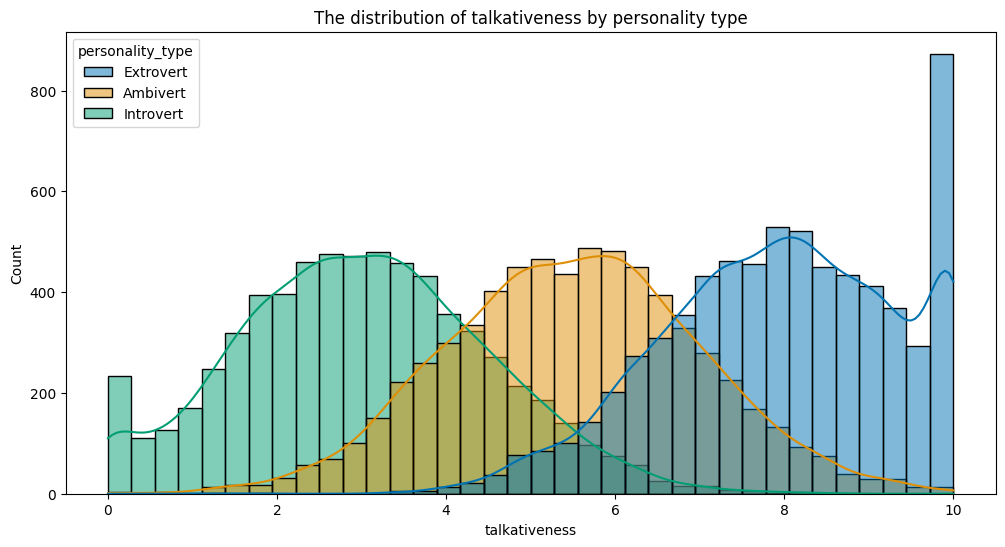

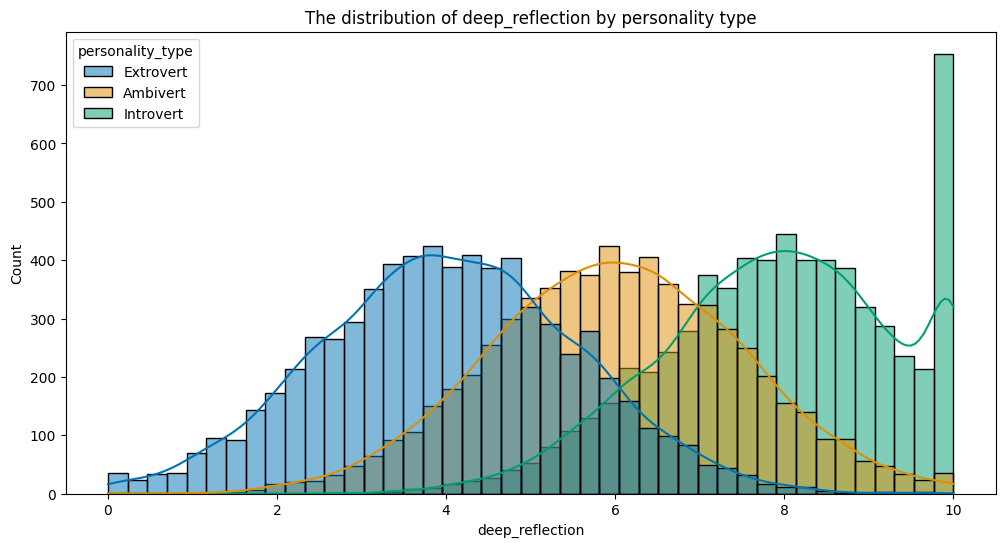

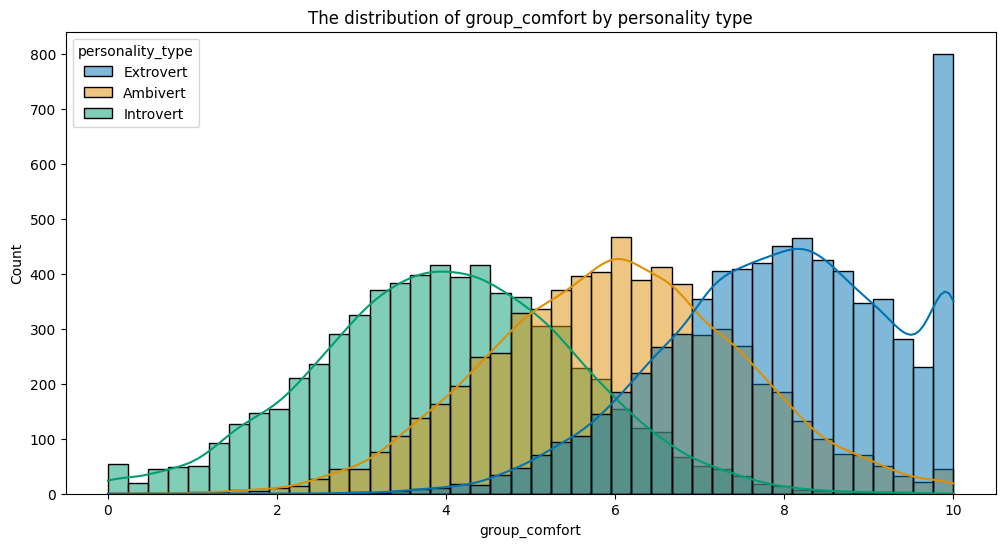

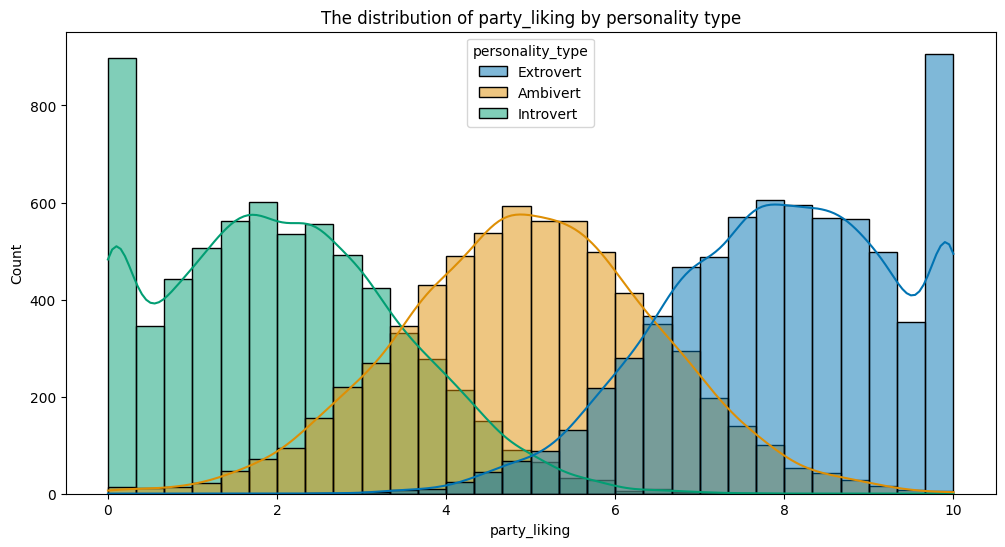

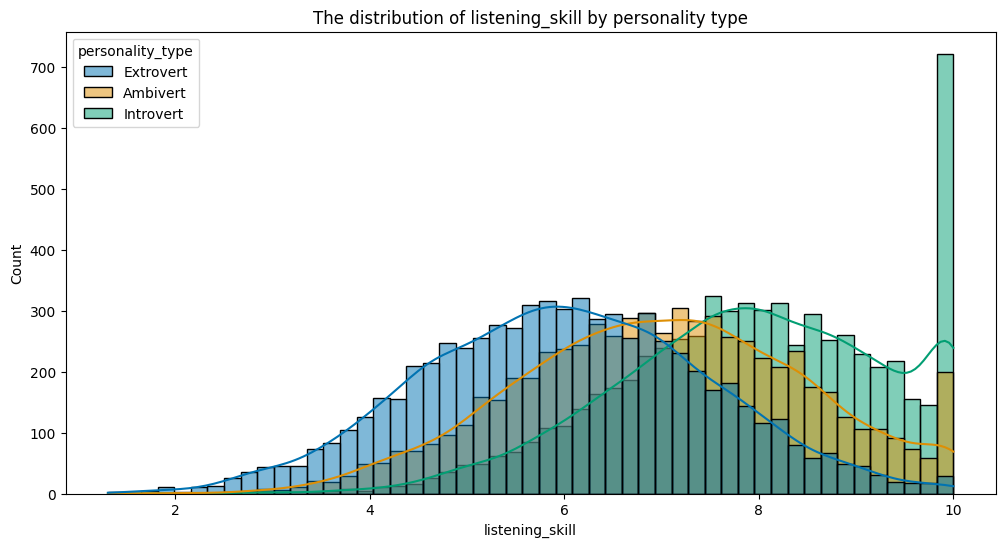

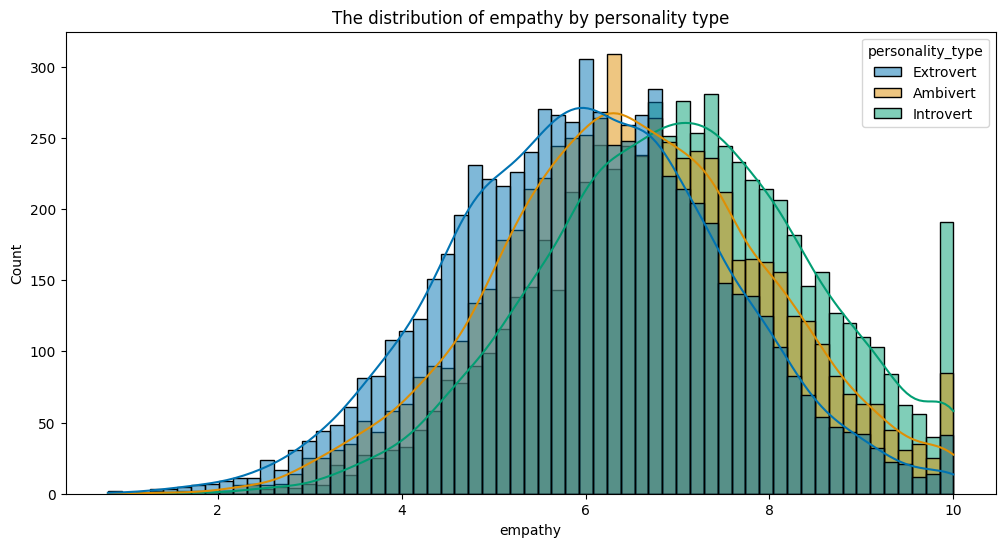

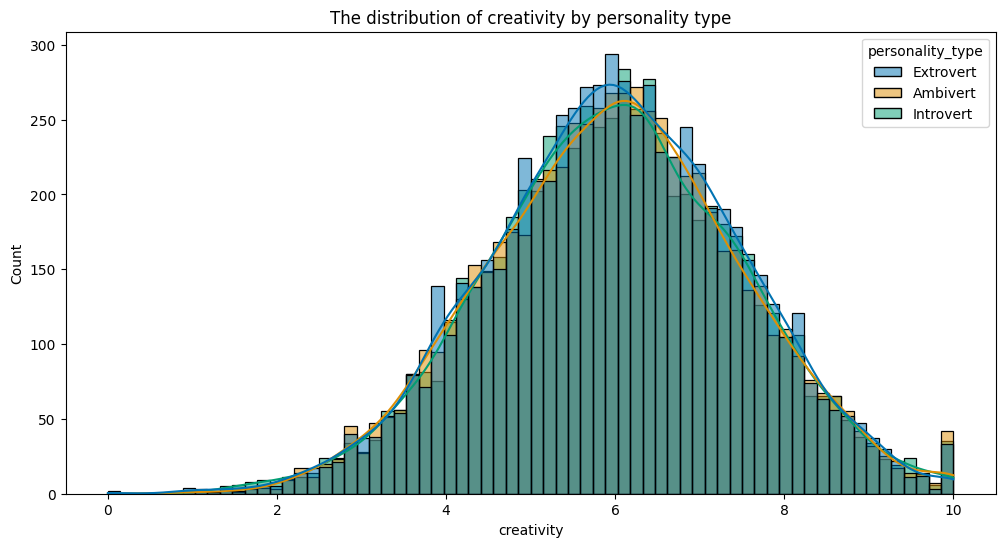

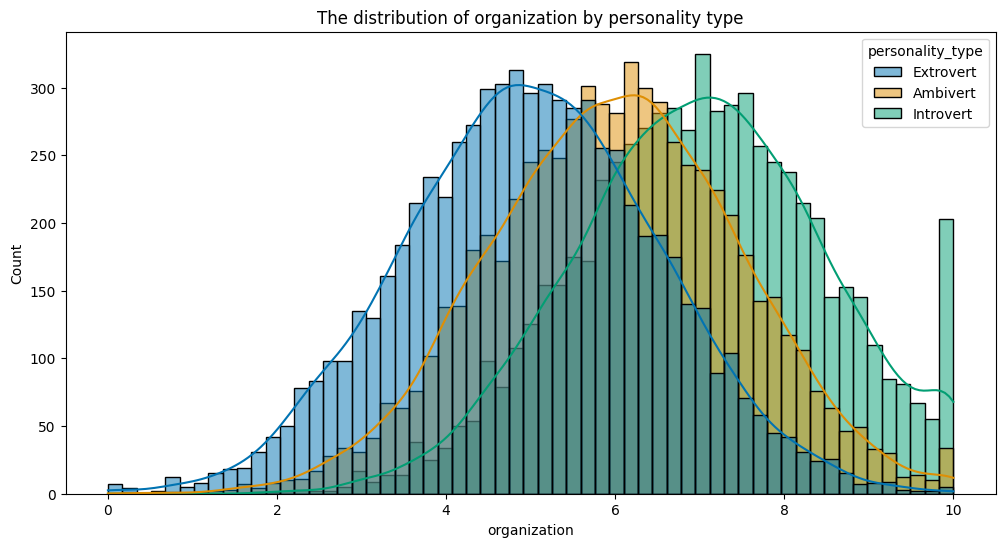

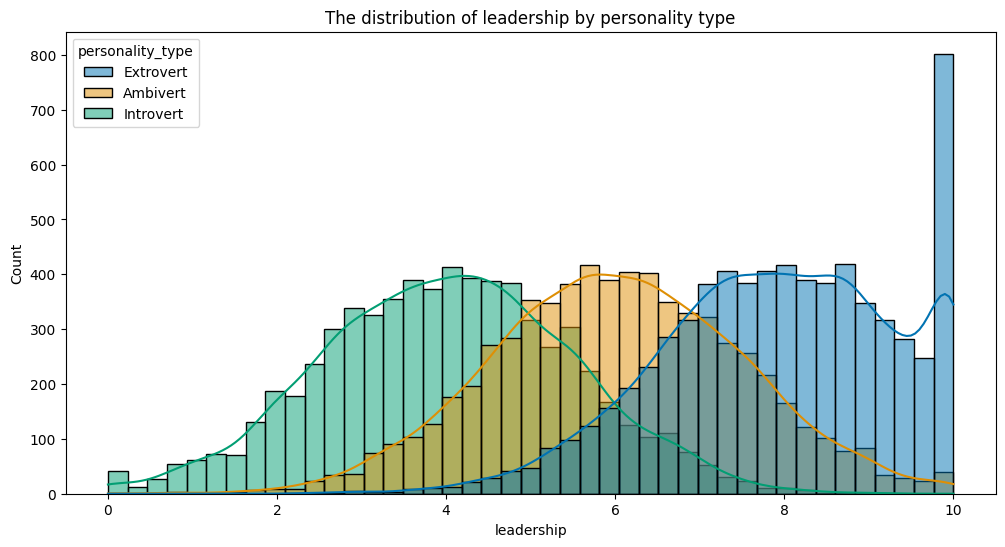

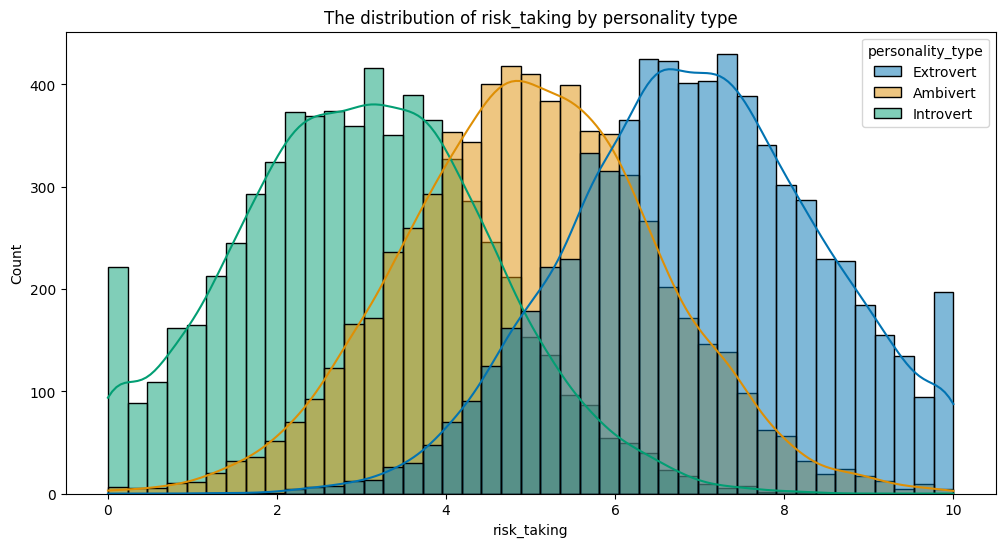

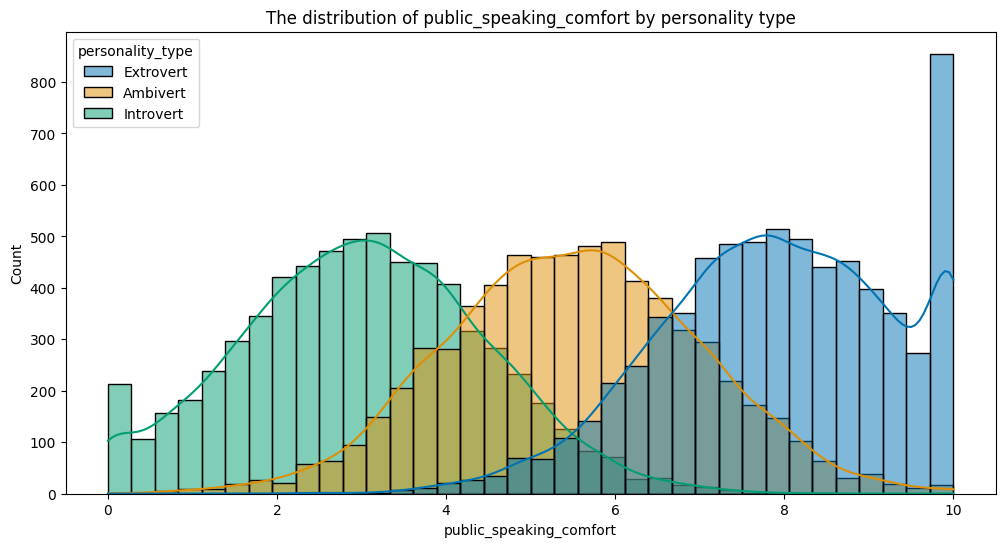

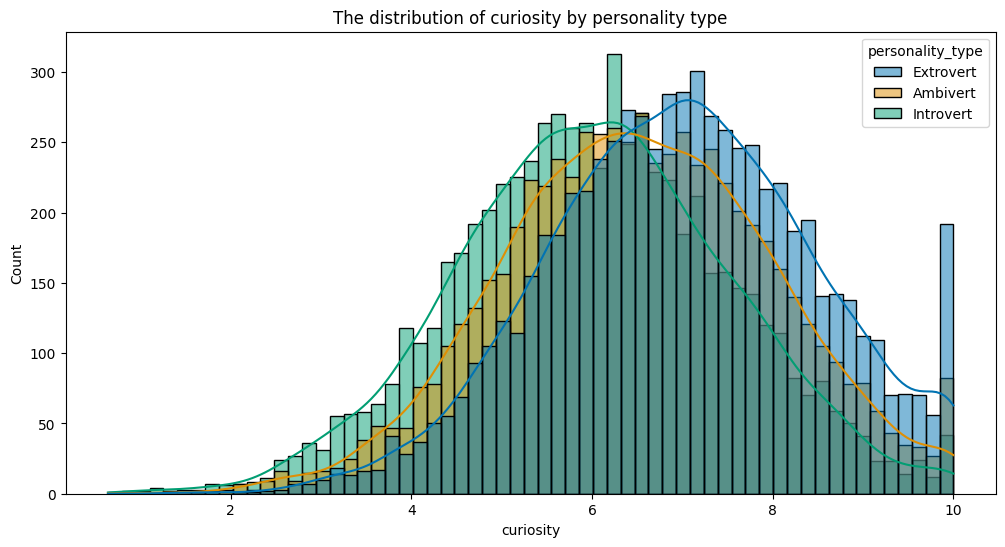

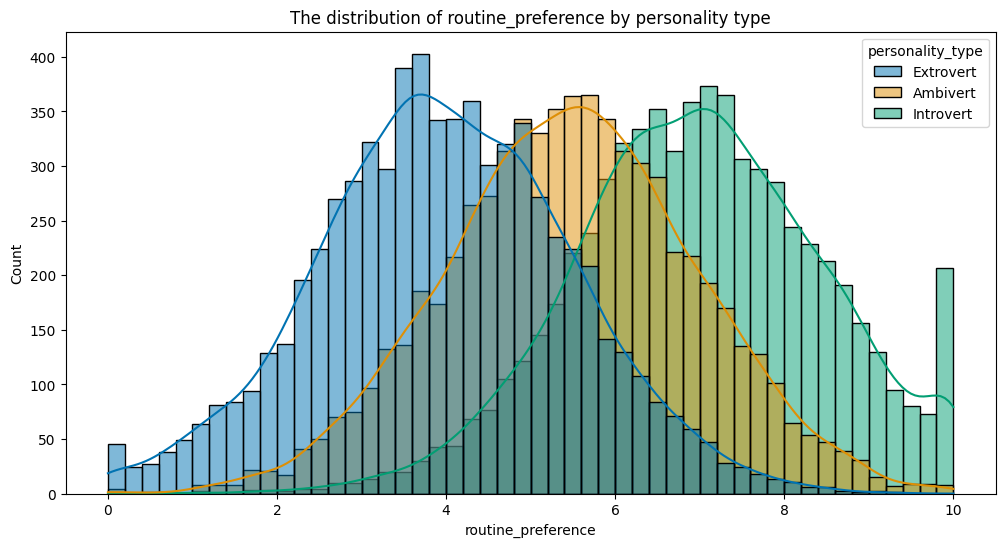

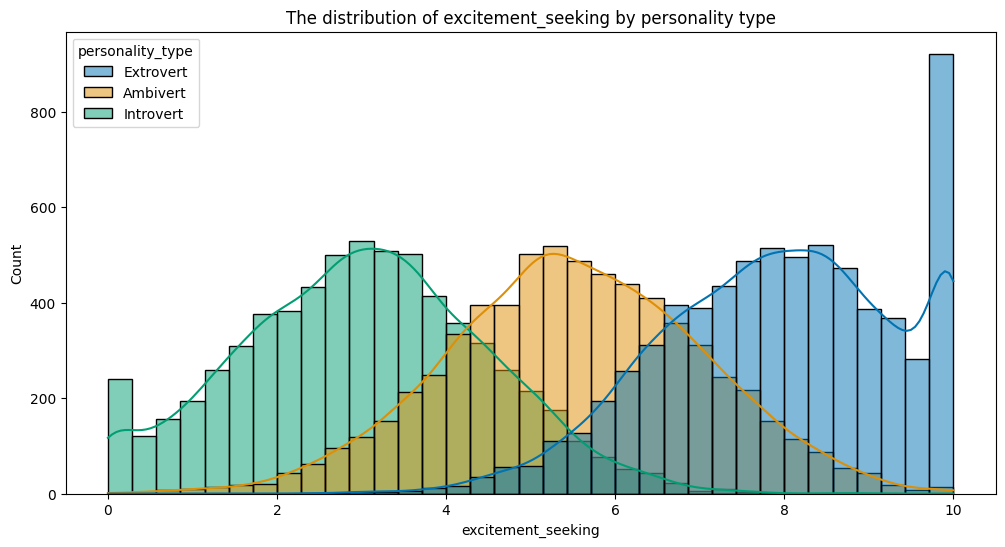

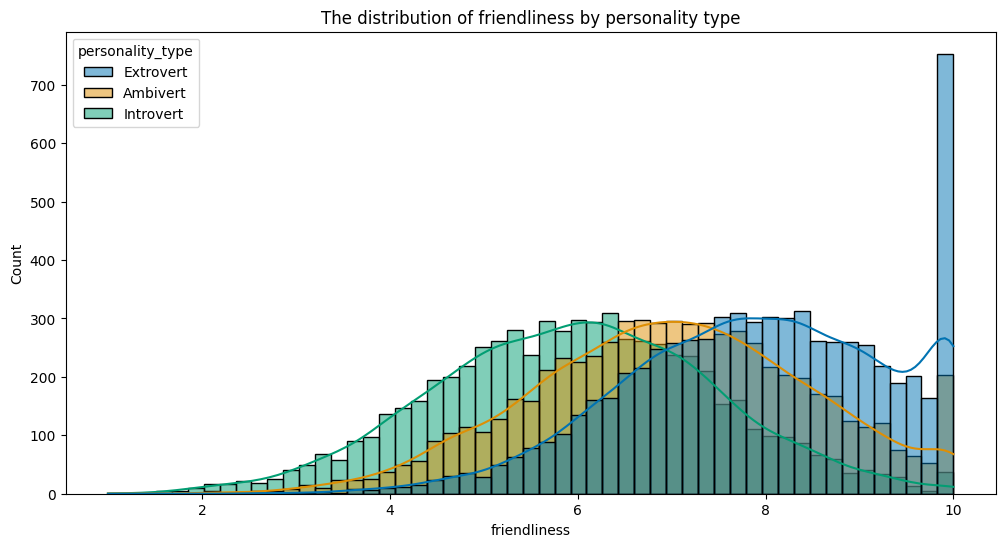

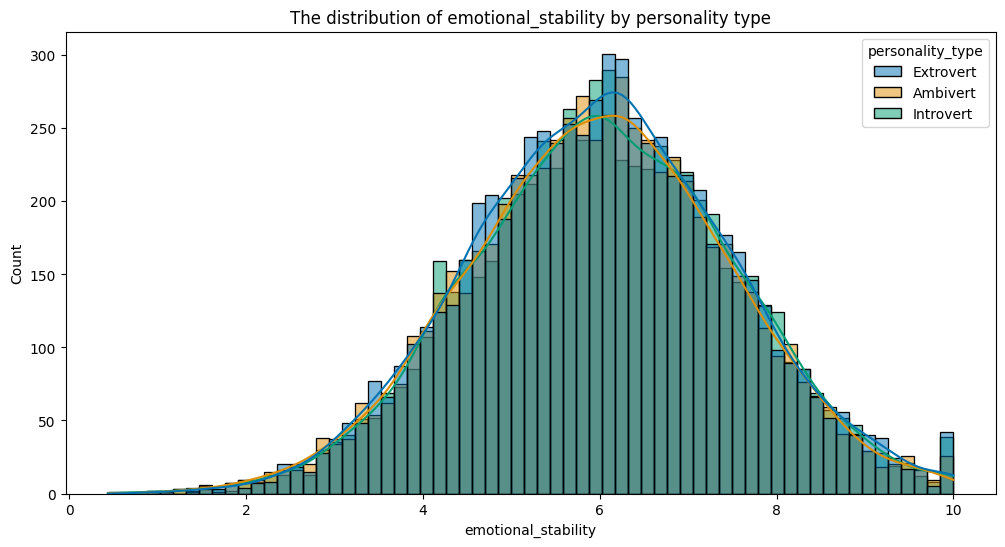

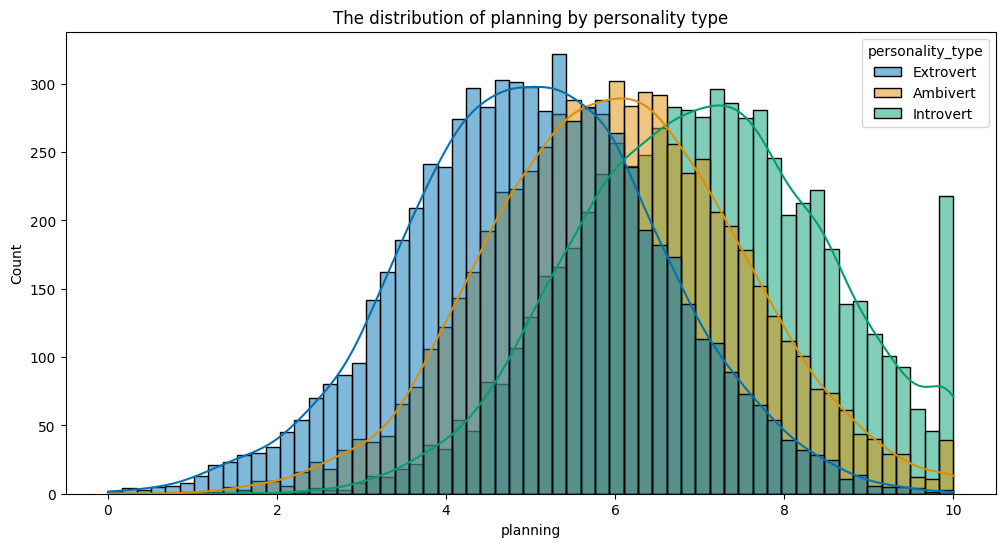

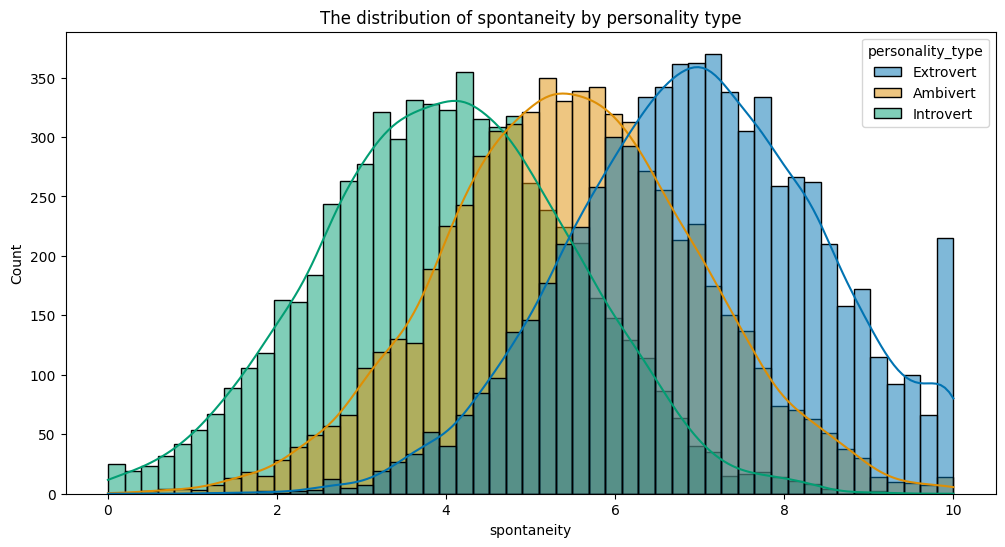

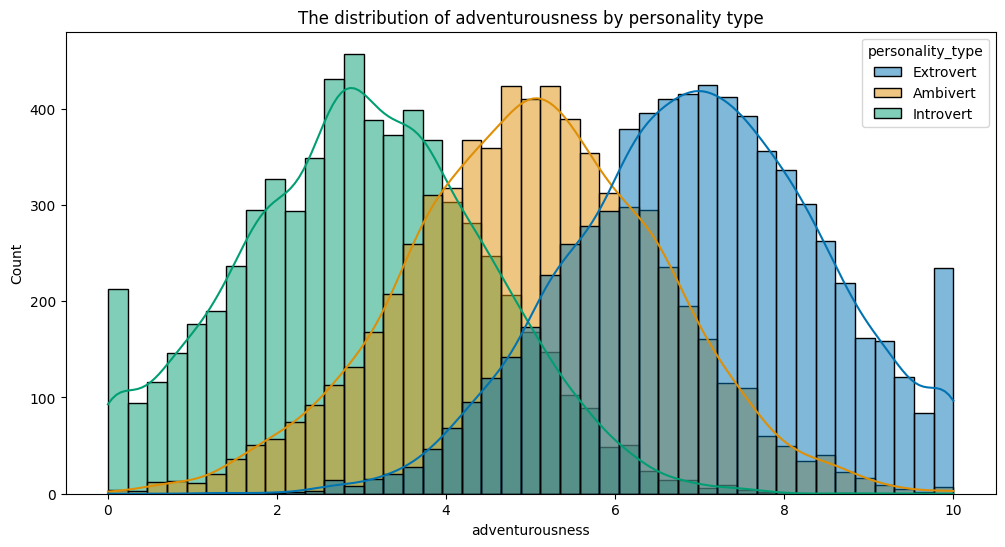

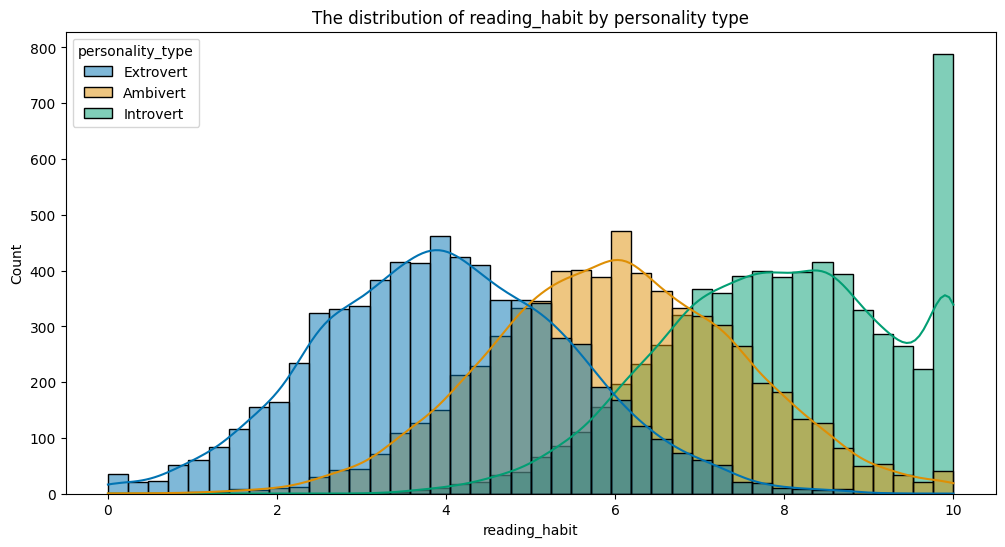

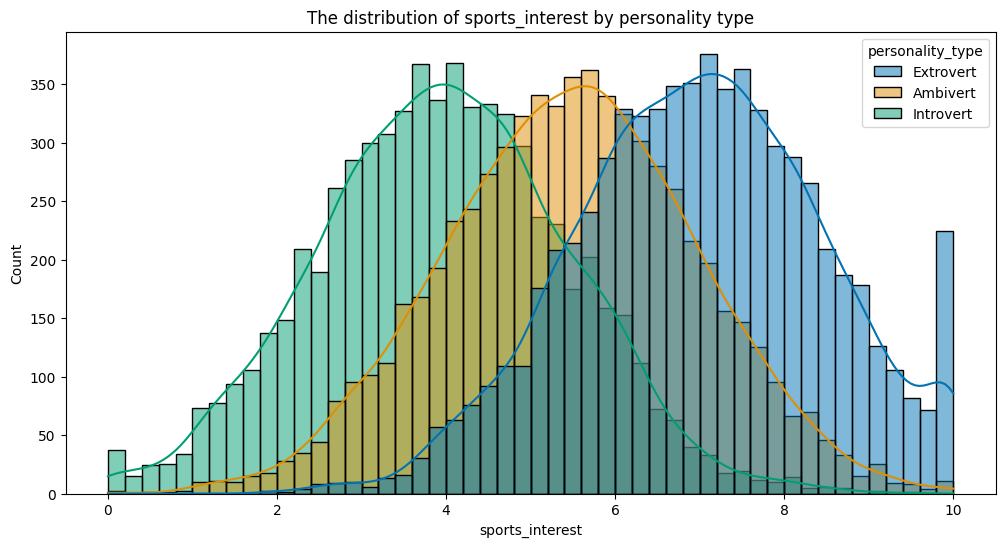

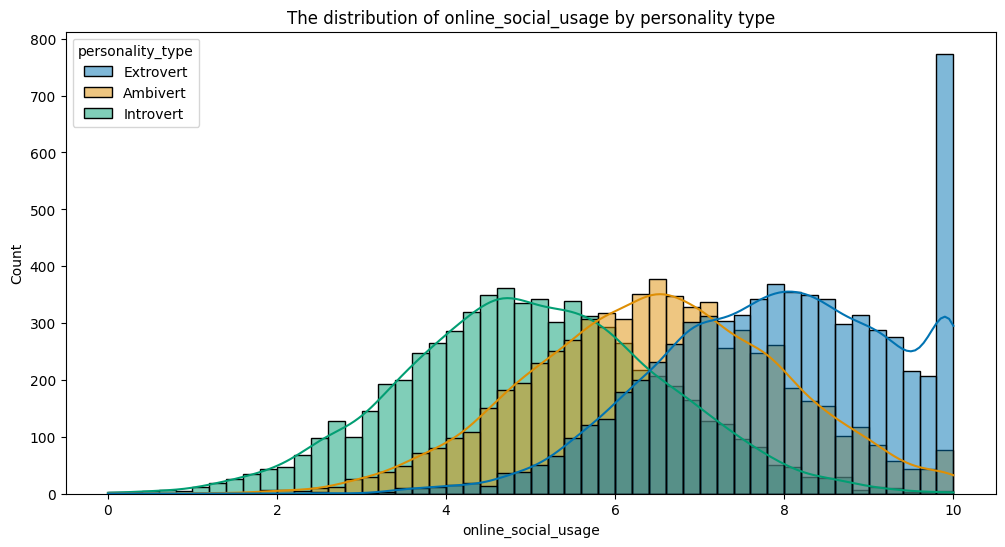

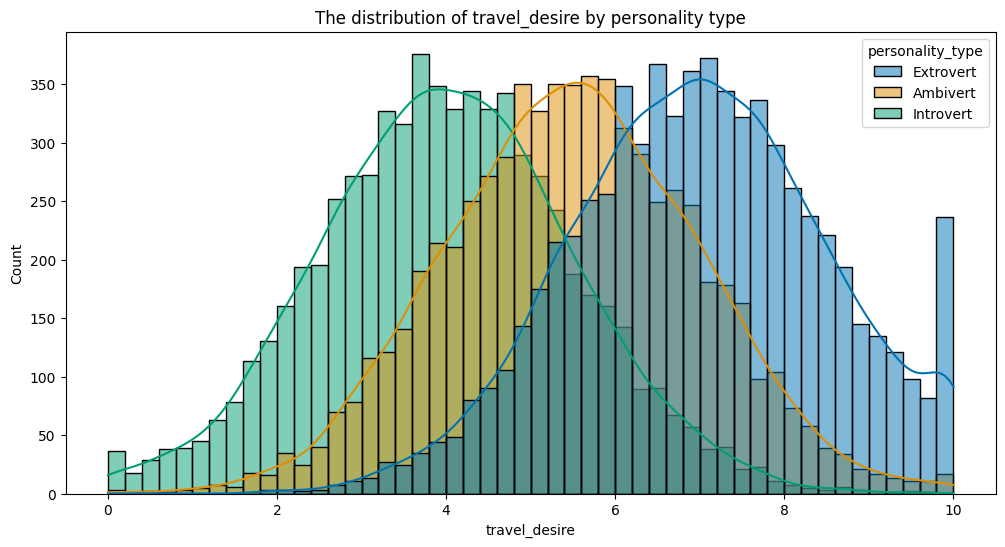

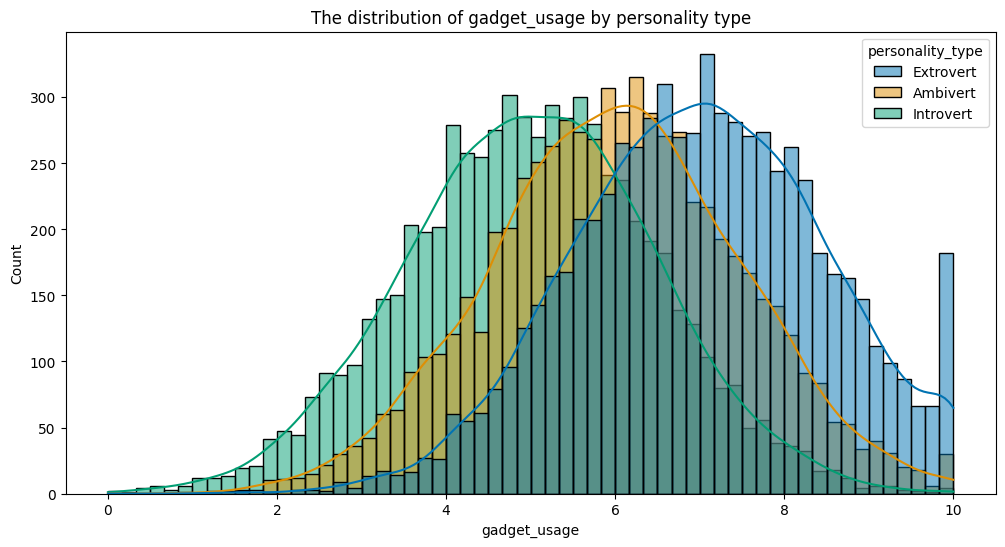

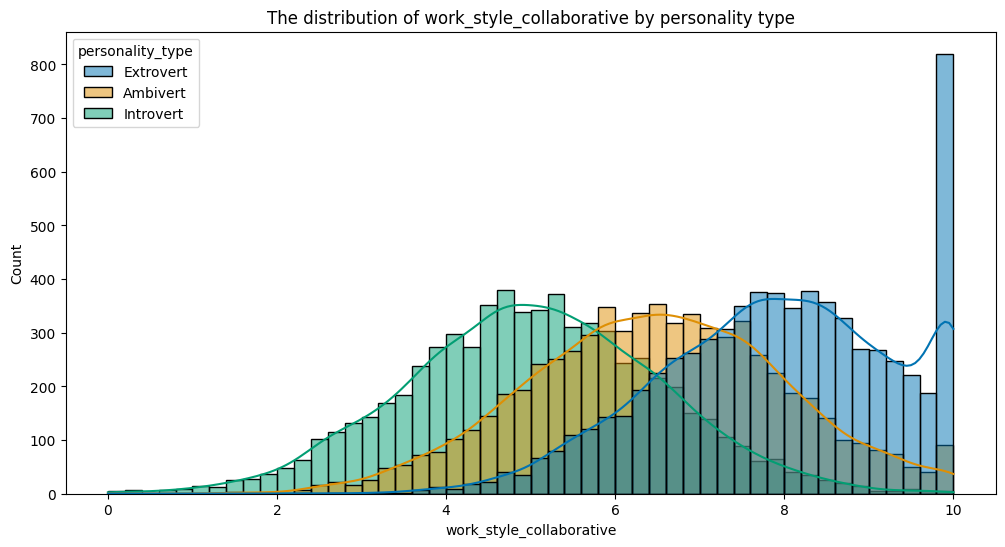

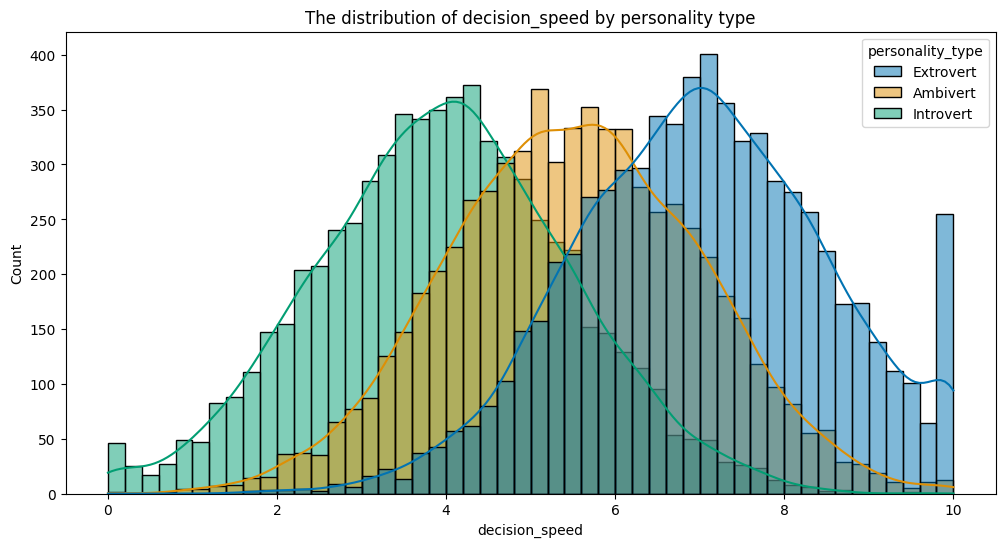

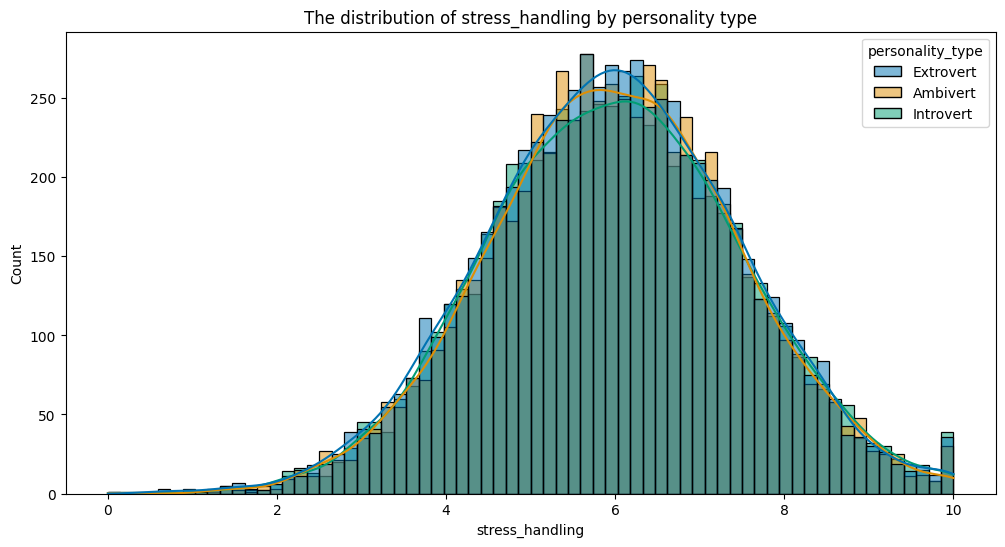

In [11]:
# Распределение признаков по классам
for col in df:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="personality_type",edgecolor="black",palette="colorblind")
    plt.title(f"The distribution of {col} by personality type")
    plt.savefig(FIGURES_DIR / f"histplot_{col}.png", dpi=300, bbox_inches='tight')
    plt.show()

### 💡 Иследую Гистограммы Обратил внимание на признаки emotional_stability, stress_handling, creativity судя по графикам они  дают слабую унивариантную разделимость классов. То есть по этим  признакам нельзя провести чёткую границу. Следуют допалнительно иследовать данные признаки. 
### И наоборот признаки risk_taking, adventurousness, excitement_seeking судя по графикам дают сильный унивариантный сигнал. Также стоит детальней изучить данные признаки


In [12]:
# Поиск признаков с константными значениями с помощью VarianceThreshold
features = df.drop(columns=["personality_type"]).columns
selector = VarianceThreshold(threshold=0.1)
selector.fit(df.drop(columns=["personality_type"]))

removed_features = features[~selector.get_support()]
removed_features

Index([], dtype='object')

### Константных признаков не обнаружено

In [13]:
# Строим сводную таблицу по признакам
features = df.drop(columns=["personality_type"])
summary =  features.describe().T

summary["IQR"] = summary["75%"] - summary["25%"]
summary["skewness"] = features.skew()
summary["kurtosis"] = features.kurt()
summary

count      mean       std       min       25%  \
social_energy             20000.0  5.509190  2.468526  0.000000  3.590989   
alone_time_preference     20000.0  5.454690  2.493731  0.000000  3.509578   
talkativeness             20000.0  5.525955  2.488006  0.000000  3.595866   
deep_reflection           20000.0  5.958689  2.162427  0.000000  4.382619   
group_comfort             20000.0  6.014381  2.178551  0.000000  4.415537   
party_liking              20000.0  5.040063  2.810563  0.000000  2.727584   
listening_skill           20000.0  6.964450  1.647944  1.308044  5.812701   
empathy                   20000.0  6.483220  1.534911  0.804853  5.448486   
creativity                20000.0  5.996018  1.496690  0.000000  4.992667   
organization              20000.0  5.973280  1.697589  0.000000  4.805742   
leadership                20000.0  6.020467  2.167352  0.000000  4.440689   
risk_taking               20000.0  5.011939  2.194518  0.000000  3.428197   
public_speaking_comfort   20000.0  5.512280  2.473666  0.000000  3.614361   
curiosity                 20000.0  6.503808  1.540848  0.642239  5.459488   
routine_preference        20000.0  5.453060  1.927818  0.000000  4.093728   
excitement_seeking        20000.0  5.528619  2.488922  0.000000  3.604003   
friendliness              20000.0  6.975712  1.659904  0.993181  5.843219   
emotional_stability       20000.0  6.015822  1.489616  0.437348  5.010091   
planning                  20000.0  5.993403  1.695048  0.000000  4.831579   
spontaneity               20000.0  5.495280  1.922809  0.000000  4.156240   
adventurousness           20000.0  5.033716  2.203344  0.000000  3.429189   
reading_habit             20000.0  5.940795  2.170924  0.000000  4.325104   
sports_interest           20000.0  5.492490  1.931728  0.000000  4.127064   
online_social_usage       20000.0  6.498574  1.889493  0.000000  5.157772   
travel_desire             20000.0  5.508935  1.932081  0.000000  4.155375   
gadget_usage              20000.0  6.006893  1.683523  0.000000  4.867919   
work_style_collaborative  20000.0  6.501986  1.889782  0.000000  5.160594   
decision_speed            20000.0  5.516168  1.944257  0.000000  4.149764   
stress_handling           20000.0  5.981982  1.490327  0.000000  4.973047   

                               50%       75%   max       IQR  skewness  \
social_energy             5.540706  7.424123  10.0  3.833134 -0.055947   
alone_time_preference     5.464038  7.416314  10.0  3.906737 -0.042489   
talkativeness             5.574786  7.472371  10.0  3.876505 -0.075797   
deep_reflection           5.972345  7.598495  10.0  3.215875 -0.103024   
group_comfort             6.051489  7.668598  10.0  3.253061 -0.138242   
party_liking              5.053005  7.363676  10.0  4.636093 -0.019719   
listening_skill           6.989855  8.155574  10.0  2.342872 -0.152574   
empathy                   6.481365  7.521483  10.0  2.072997 -0.059049   
creativity                6.003320  7.013412  10.0  2.020745 -0.043462   
organization              5.986871  7.142282  10.0  2.336540 -0.060377   
leadership                6.043213  7.648665  10.0  3.207976 -0.113290   
risk_taking               5.011712  6.601652  10.0  3.173456 -0.013478   
public_speaking_comfort   5.534720  7.442047  10.0  3.827686 -0.064826   
curiosity                 6.498428  7.565165  10.0  2.105677 -0.073646   
routine_preference        5.471214  6.816697  10.0  2.722969 -0.036844   
excitement_seeking        5.544744  7.501737  10.0  3.897734 -0.078380   
friendliness              6.997957  8.174691  10.0  2.331472 -0.175142   
emotional_stability       6.026506  7.024086  10.0  2.013995 -0.025725   
planning                  5.981147  7.166853  10.0  2.335274 -0.034742   
spontaneity               5.499699  6.853083  10.0  2.696843 -0.027868   
adventurousness           5.045021  6.656162  10.0  3.226973 -0.016148   
reading_habit             5.962857  7.564929  10.0  3.239825 -0.077157   
sports_interest

In [14]:
# Топ дискриминативных признаков (ANOVA F-test)
le = LabelEncoder()
y = le.fit_transform(df["personality_type"])
X = df.drop(columns=["personality_type"])

f_scores, p_values = f_classif(X, y)

importance_df = pd.DataFrame({
    "feature": X.columns,
    "f_score": f_scores,
    "p_value": p_values
}).sort_values(by="f_score", ascending=False)

importance_df.head(10)


feature       f_score  p_value
5              party_liking  28878.230314      0.0
1     alone_time_preference  19614.798420      0.0
12  public_speaking_comfort  19578.062000      0.0
2             talkativeness  19446.844628      0.0
15       excitement_seeking  19160.462944      0.0
0             social_energy  18674.734968      0.0
21            reading_habit  12422.815562      0.0
4             group_comfort  12418.715253      0.0
10               leadership  12249.376283      0.0
20          adventurousness  11918.450912      0.0

### Результаты ANOVA F-test показали наличие группы признаков с очень высокой унивариантной разделимостью классов (F-score > 10 000, p-value ≪ 0.001). Наиболее дискриминативными оказались признаки, связанные с социальной активностью(party_liking,alone_time_preference,public_speaking_comfort,talkativeness).

### Несмотря на высокую унивариантную значимость, окончательная информативность признаков должна оцениваться в многомерной модели с учётом взаимодействий.

### Топ 10 признаков с высокими показателями потенцеально сильные  Features для моделей.

In [15]:
importance_df

feature       f_score        p_value
5               party_liking  28878.230314   0.000000e+00
1      alone_time_preference  19614.798420   0.000000e+00
12   public_speaking_comfort  19578.062000   0.000000e+00
2              talkativeness  19446.844628   0.000000e+00
15        excitement_seeking  19160.462944   0.000000e+00
0              social_energy  18674.734968   0.000000e+00
21             reading_habit  12422.815562   0.000000e+00
4              group_comfort  12418.715253   0.000000e+00
10                leadership  12249.376283   0.000000e+00
20           adventurousness  11918.450912   0.000000e+00
3            deep_reflection  11801.516164   0.000000e+00
11               risk_taking  11664.666534   0.000000e+00
22           sports_interest   6989.798213   0.000000e+00
27            decision_speed   6931.133801   0.000000e+00
14        routine_preference   6784.916372   0.000000e+00
24             travel_desire   6614.107758   0.000000e+00
23       online_social_usage   6601.649871   0.000000e+00
26  work_style_collaborative   6578.633425   0.000000e+00
19               spontaneity   6557.206373   0.000000e+00
25              gadget_usage   3070.514334   0.000000e+00
16              friendliness   3044.733619   0.000000e+00
6            listening_skill   3009.268982   0.000000e+00
9               organization   2991.681333   0.000000e+00
18                  planning   2959.231928   0.000000e+00
7                    empathy    718.923093  3.090190e-302
13                 curiosity    697.569285  1.413738e-293
17       emotional_stability      1.814454   1.629537e-01
28           stress_handling      0.795220   4.514964e-01
8                 creativity      0.030560   9.699025e-01

In [16]:
#  описательные статистики по классам для интересующих признаков
features_of_interest = [
    'party_liking',
 'alone_time_preference',
 'public_speaking_comfort',
 'talkativeness',
 'excitement_seeking',
 'empathy',
 'curiosity',
 'emotional_stability',
 'stress_handling',
 'creativity'
]

grouped_df = df.groupby("personality_type")[features_of_interest].describe()
grouped_df

party_liking                                         \
                        count      mean       std      min       25%   
personality_type                                                       
Ambivert               6573.0  4.983452  1.520772  0.00000  3.968684   
Extrovert              6857.0  7.961159  1.369701  2.65461  7.003158   
Introvert              6570.0  2.048000  1.383172  0.00000  0.968161   

                                                alone_time_preference  \
                       50%       75%        max                 count   
personality_type                                                        
Ambivert          4.986989  5.997928  10.000000                6573.0   
Extrovert         8.027266  9.029251  10.000000                6857.0   
Introvert         1.967049  2.991747   7.561858                6570.0   

                                                                              \
                      mean       std       min       25%       50%       75%   
personality_type                                                               
Ambivert          5.499532  1.503390  0.358517  4.475732  5.520742  6.529616   
Extrovert         3.008493  1.459926  0.000000  1.976961  2.982585  3.992771   
Introvert         7.962882  1.380786  2.827936  7.030286  8.044487  9.036438   

                            public_speaking_comfort                      \
                        max                   count      mean       std   
personality_type                                                          
Ambivert          10.000000                  6573.0  5.498913  1.491212   
Extrovert          8.618069                  6857.0  7.923062  1.384728   
Introvert         10.000000                  6570.0  3.009559  1.439330   

                                                                     \
                       min       25%       50%       75%        max   
personality_type                                                      
Ambivert          0.000000  4.487338  5.499124  6.503761  10.000000   
Extrovert         2.278692  6.984604  7.952570  8.998705  10.000000   
Introvert         0.000000  2.007515  3.010869  3.994034   8.356055   

                 talkativeness                                          \
                         count      mean       std       min       25%   
personality_type                                                         
Ambivert                6573.0  5.505193  1.497371  0.000000  4.492827   
Extrovert               6857.0  7.951506  1.377597  1.305547  7.004051   
Introvert               6570.0  3.015219  1.474937  0.000000  1.973071   

                                                excitement_seeking            \
                       50%       75%        max              count      mean   
personality_type                                                               
Ambivert          5.527311  6.510549  10.000000             6573.0  5.523381   
Extrovert         8.018230  9.042480  10.000000             6857.0  7.941410   
Introvert         2.990143  4.002311   8.640233             6570.0  3.015670   

                                                                               \
                       std       min       25%       50%       75%        max   
personality_type                                                                
Ambivert          1.516122  0.174778  4.512442  5.503770  6.559267  10.000000   
Extrovert         1.394612  2.426661  6.956766  8.011384  9.032223  10.000000   
Introvert         1.461944  0.000000  1.989460  3.027233  4.001493   8.739383   

                 empathy                                                    \
                   count      mean       std       min       25%       50%   
personality_type                                                             
Ambivert          6573.0  6.493101  1.480857  1.344470  5.507250  6.469566   
Extrovert         6857.0  6.003546  1.491150  0.804853  4.981

### На числах(наблюдая  расхождения медианых значений и значений по квантелям) убеждаемсся что  есть признаки даюшие сильные и слабые  унивариантный сигнал

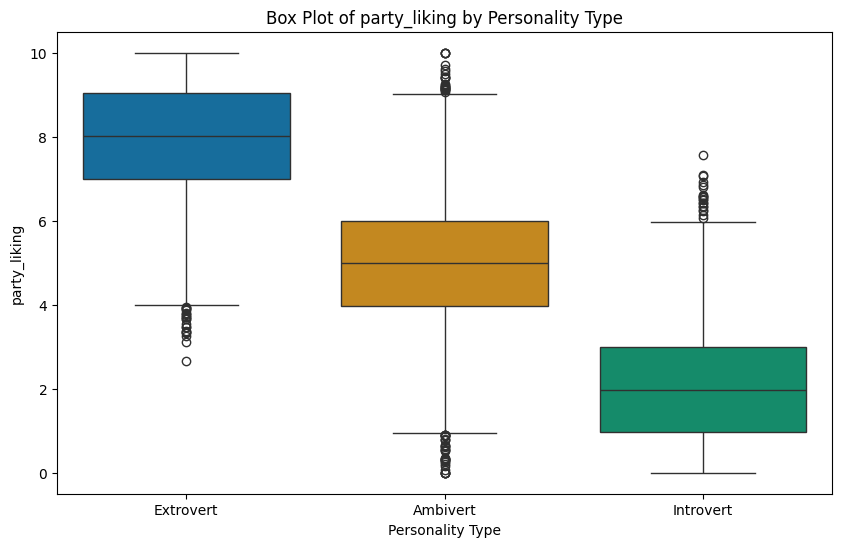

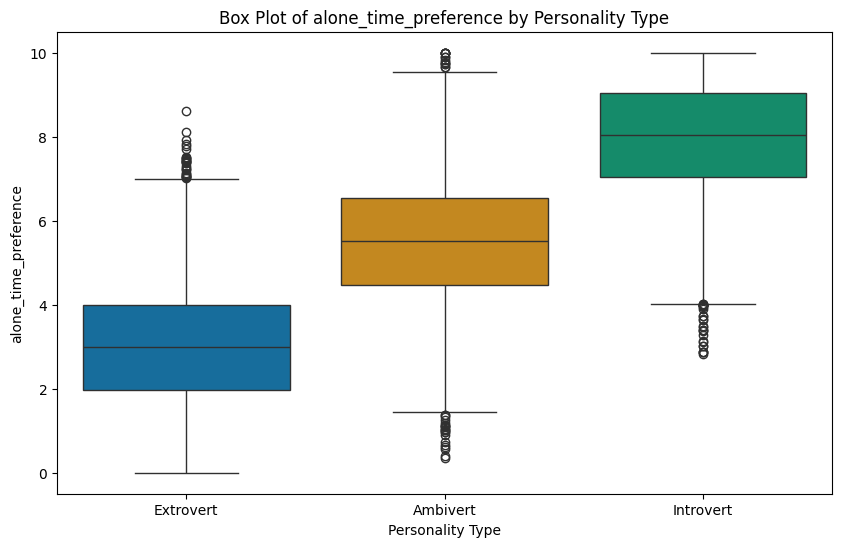

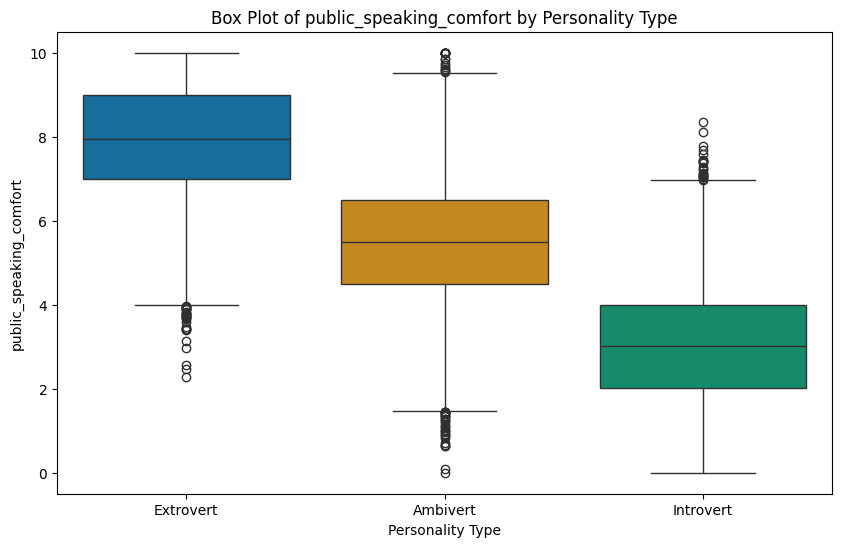

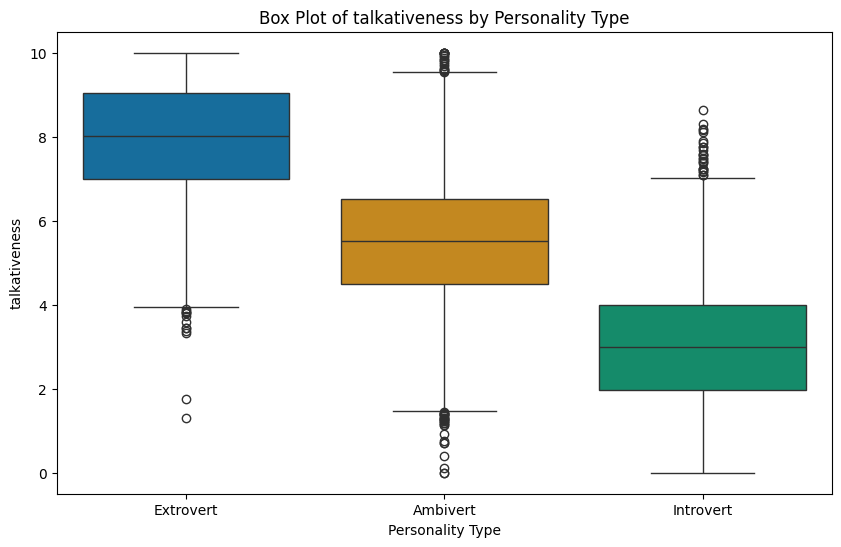

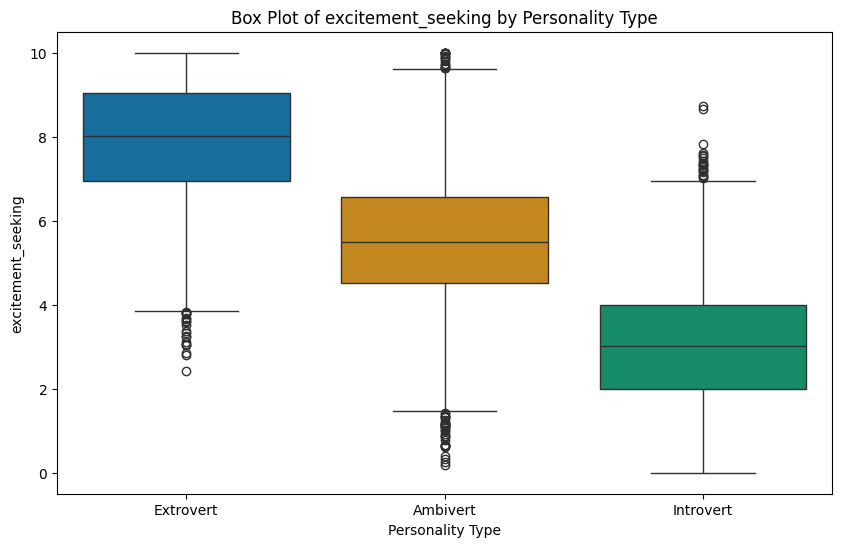

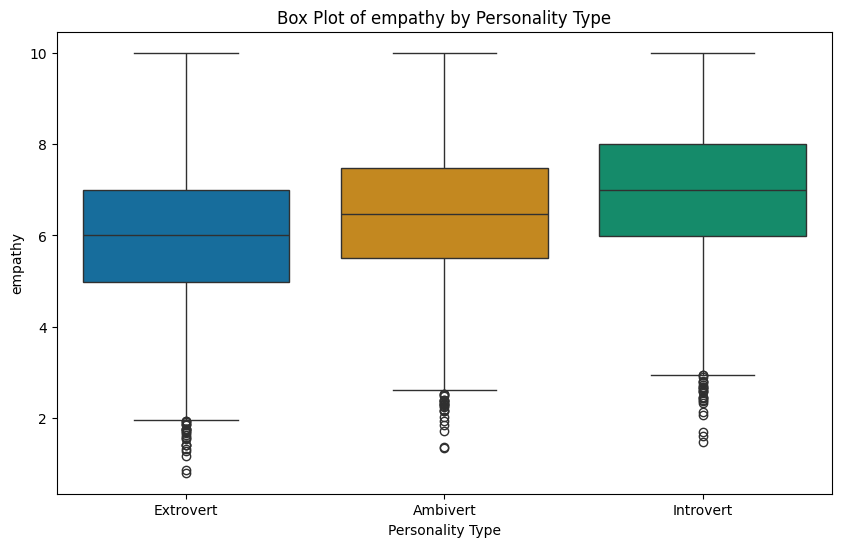

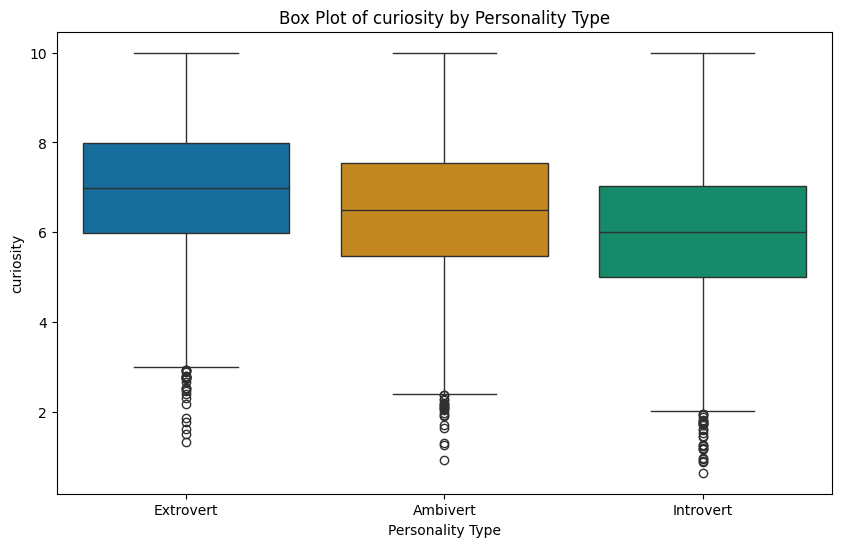

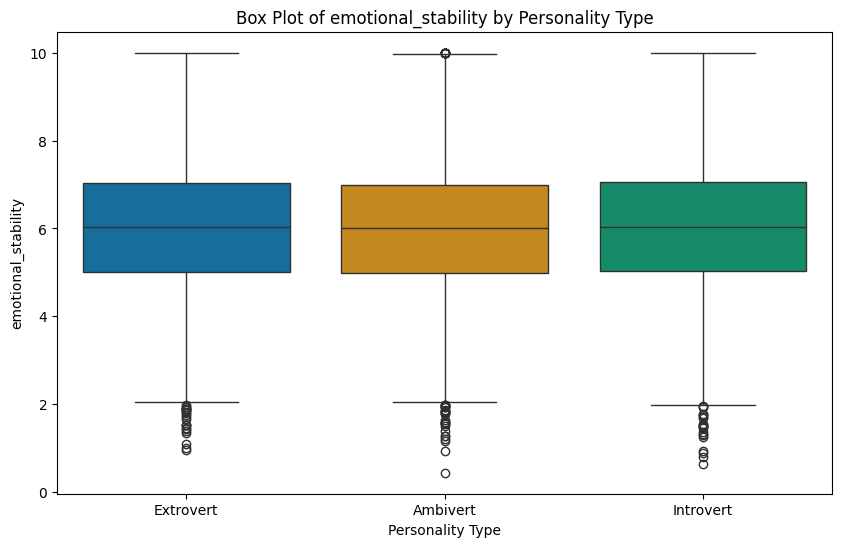

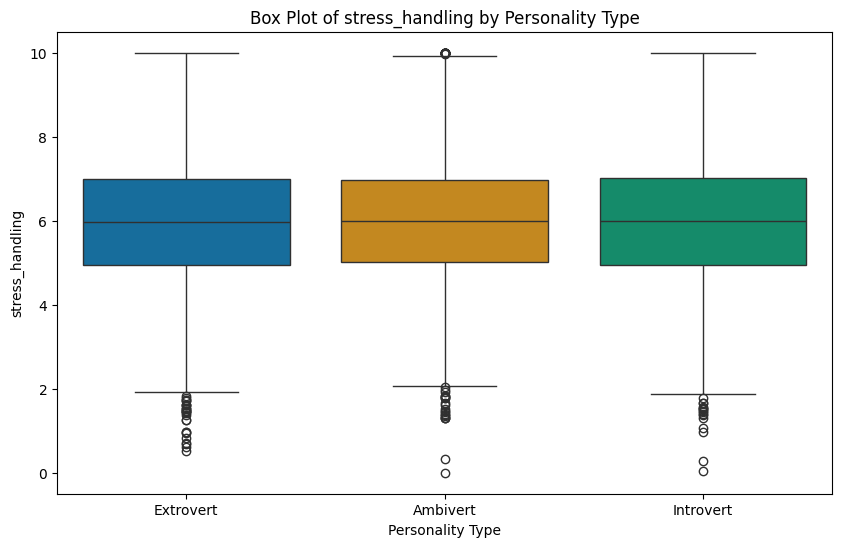

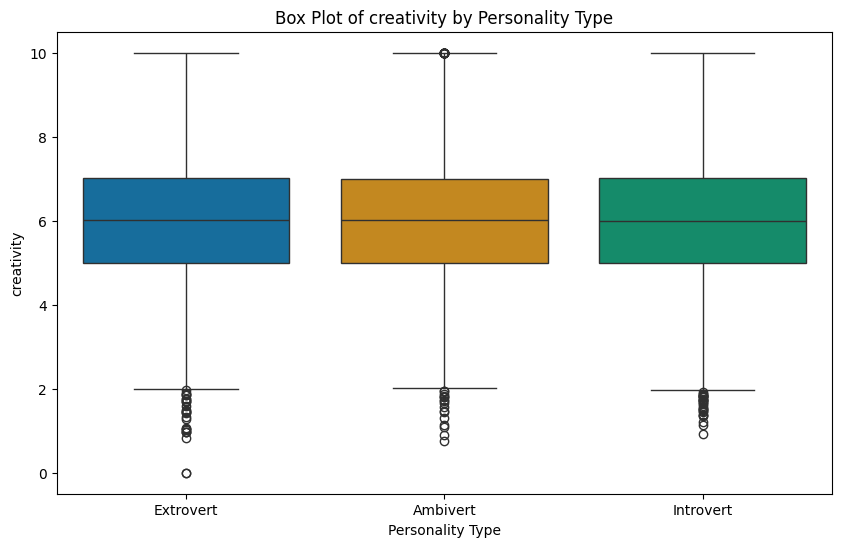

In [17]:
# Box plot для признаков с сильным унивариантным сигналом
for feature in features_of_interest:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="personality_type", y=feature, data=df,hue="personality_type", palette="colorblind")
    plt.title(f"Box Plot of {feature} by Personality Type")
    plt.xlabel("Personality Type")
    plt.savefig(FIGURES_DIR / f"boxplot_{feature}.png", dpi=300, bbox_inches='tight')
    plt.ylabel(feature)


### Гипотеза. По графикам и статистическим данным наблюдаем что класс Ambivert "Cмешанный/Cредний класс".Этот класс имеет выбросы в обе стороны что может говорить о внутреклассовой неожнородности. Возможно объекты этого класса которые являються пограничными легко спутать с другими классами


In [18]:
features = df.drop(columns=["personality_type"])

In [19]:
def iqr_outlier_stats(data):
    """
    Вычисляет статистику выбросов IQR для данных.
    
    Args:
        data: pd.Series или pd.DataFrame с данными
    
    Returns:
        pd.Series: Статистика выбросов IQR
    """

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    mask = (data < lower) | (data > upper)

    return pd.Series({
        "outlier_share": mask.mean(),
        "outlier_count": mask.sum()
    })

In [20]:
iqr_outliers = (
    features
    .apply(iqr_outlier_stats)
    .T
    .reset_index()
    .rename(columns={"index": "feature"})
)

iqr_outliers

feature  outlier_share  outlier_count
0              social_energy        0.00000            0.0
1      alone_time_preference        0.00000            0.0
2              talkativeness        0.00000            0.0
3            deep_reflection        0.00000            0.0
4              group_comfort        0.00000            0.0
5               party_liking        0.00000            0.0
6            listening_skill        0.00155           31.0
7                    empathy        0.00355           71.0
8                 creativity        0.00375           75.0
9               organization        0.00260           52.0
10                leadership        0.00000            0.0
11               risk_taking        0.00000            0.0
12   public_speaking_comfort        0.00000            0.0
13                 curiosity        0.00335           67.0
14        routine_preference        0.00170           34.0
15        excitement_seeking        0.00000            0.0
16              friendliness        0.00290           58.0
17       emotional_stability        0.00365           73.0
18                  planning        0.00315           63.0
19               spontaneity        0.00110           22.0
20           adventurousness        0.00000            0.0
21             reading_habit        0.00000            0.0
22           sports_interest        0.00125           25.0
23       online_social_usage        0.00115           23.0
24             travel_desire        0.00155           31.0
25              gadget_usage        0.00280           56.0
26  work_style_collaborative        0.00155           31.0
27            decision_speed        0.00175           35.0
28           stress_handling        0.00335           67.0

### Анализ выбросов на основе межквартильного размаха (IQR) показал отсутствие значимых выбросов для большинства признаков и лишь незначительную долю крайних значений (<0.5%) для отдельных характеристик. Это указывает на стабильность распределений и отсутствие необходимости в агрессивной очистке данных.

In [21]:
pairs = [
('party_liking', 'talkativeness'),
('alone_time_preference', 'public_speaking_comfort'),
('public_speaking_comfort','party_liking'),
('talkativeness','excitement_seeking'),
('creativity','empathy'),
("party_liking","creativity"),
("public_speaking_comfort","empathy")
]

In [22]:
def plot_scatter_pairs(df, pairs, sample_n=4000, TARGET="personality_type"):
    """
    Визуализация парных распределений признаков в датасете.
    
    Args:
        df: pd.DataFrame - исходный датасет
        pairs: list of tuples - пары признаков для визуализации
        sample_n: int - количество строк для выборки (по умолчанию 4000)
        TARGET: str - имя целевого признака
    """
    d = df.copy()
    if sample_n is not None and len(d) > sample_n:
        d = d.sample(sample_n, random_state=42)

    for x, y in pairs:
        plt.figure(figsize=(7, 5))
        sns.scatterplot(
            data=d, x=x, y=y, hue=TARGET,
            alpha=0.35, s=18, linewidth=0
        )
        plt.title(f"Scatter: {x} vs {y}")
        plt.tight_layout()
        plt.savefig(FIGURES_DIR / f"sccaterplot_{x}vs{y}.png", dpi=300, bbox_inches='tight')
        plt.show()

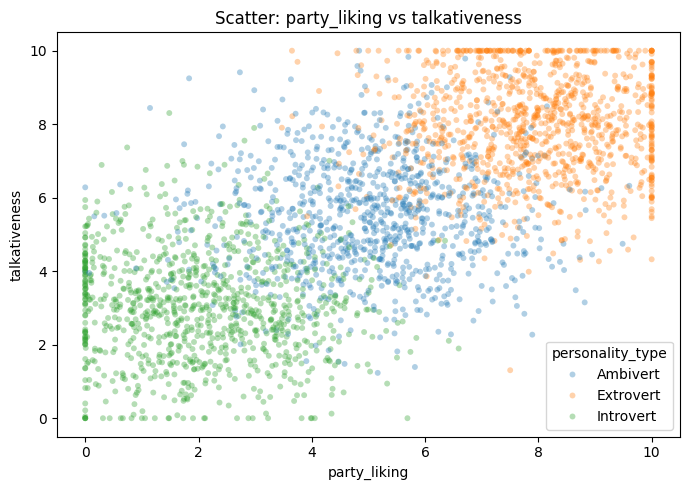

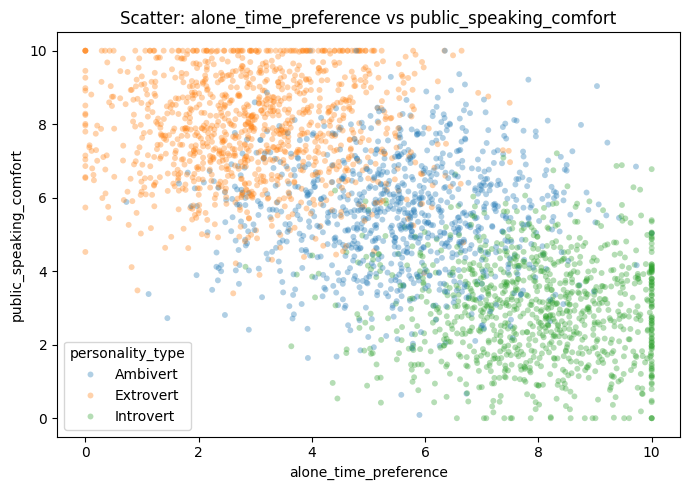

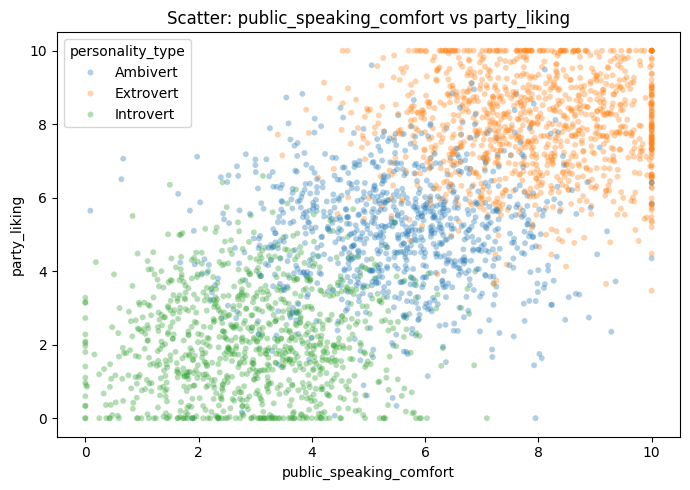

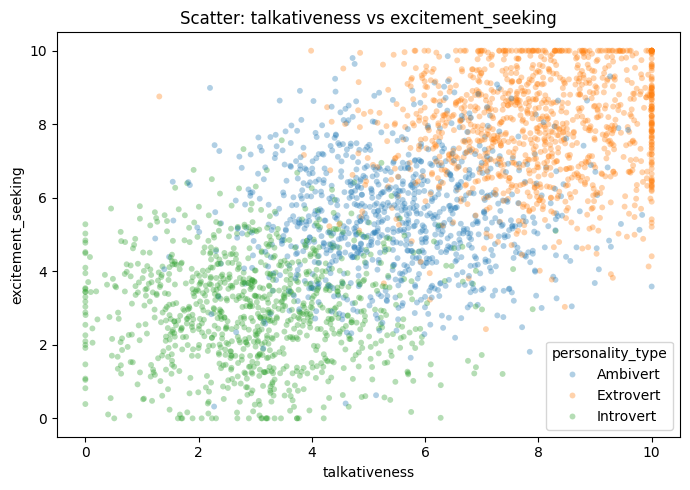

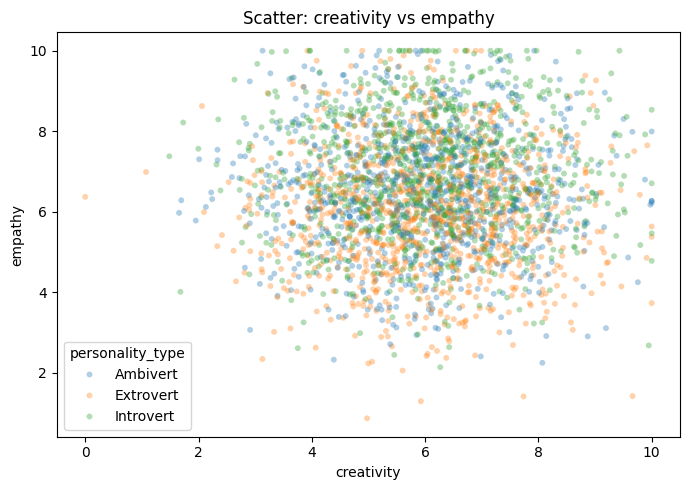

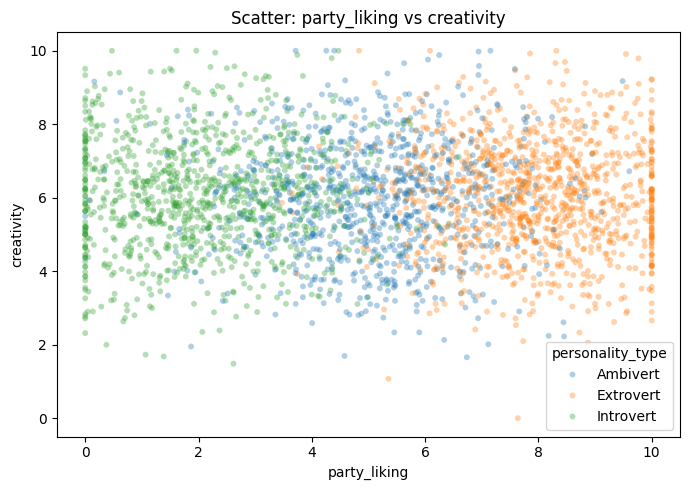

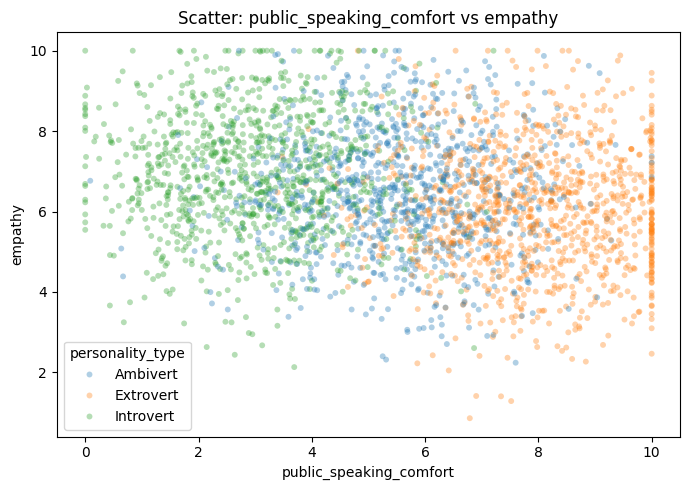

In [23]:

plot_scatter_pairs(df, pairs, sample_n=3000)

### Можно наблюдать как классы разделяються по комбинации двух признаков .
### Класс Ambivert имеет много пограничных точек,где он похож на Introvert или Extrovert.
### Гипотеза ошибки будут чаще всего Ambivert↔Introvert и Ambivert↔Extrovert, а не Introvert↔Extrovert.

### При наблюдение за парами признаков с сильным vs слабым унивитарным сигналом. Наблюдаються горизонтальные полосы точек . Что говорит что вклад в разделения классов дает 1 признак из этой пары.

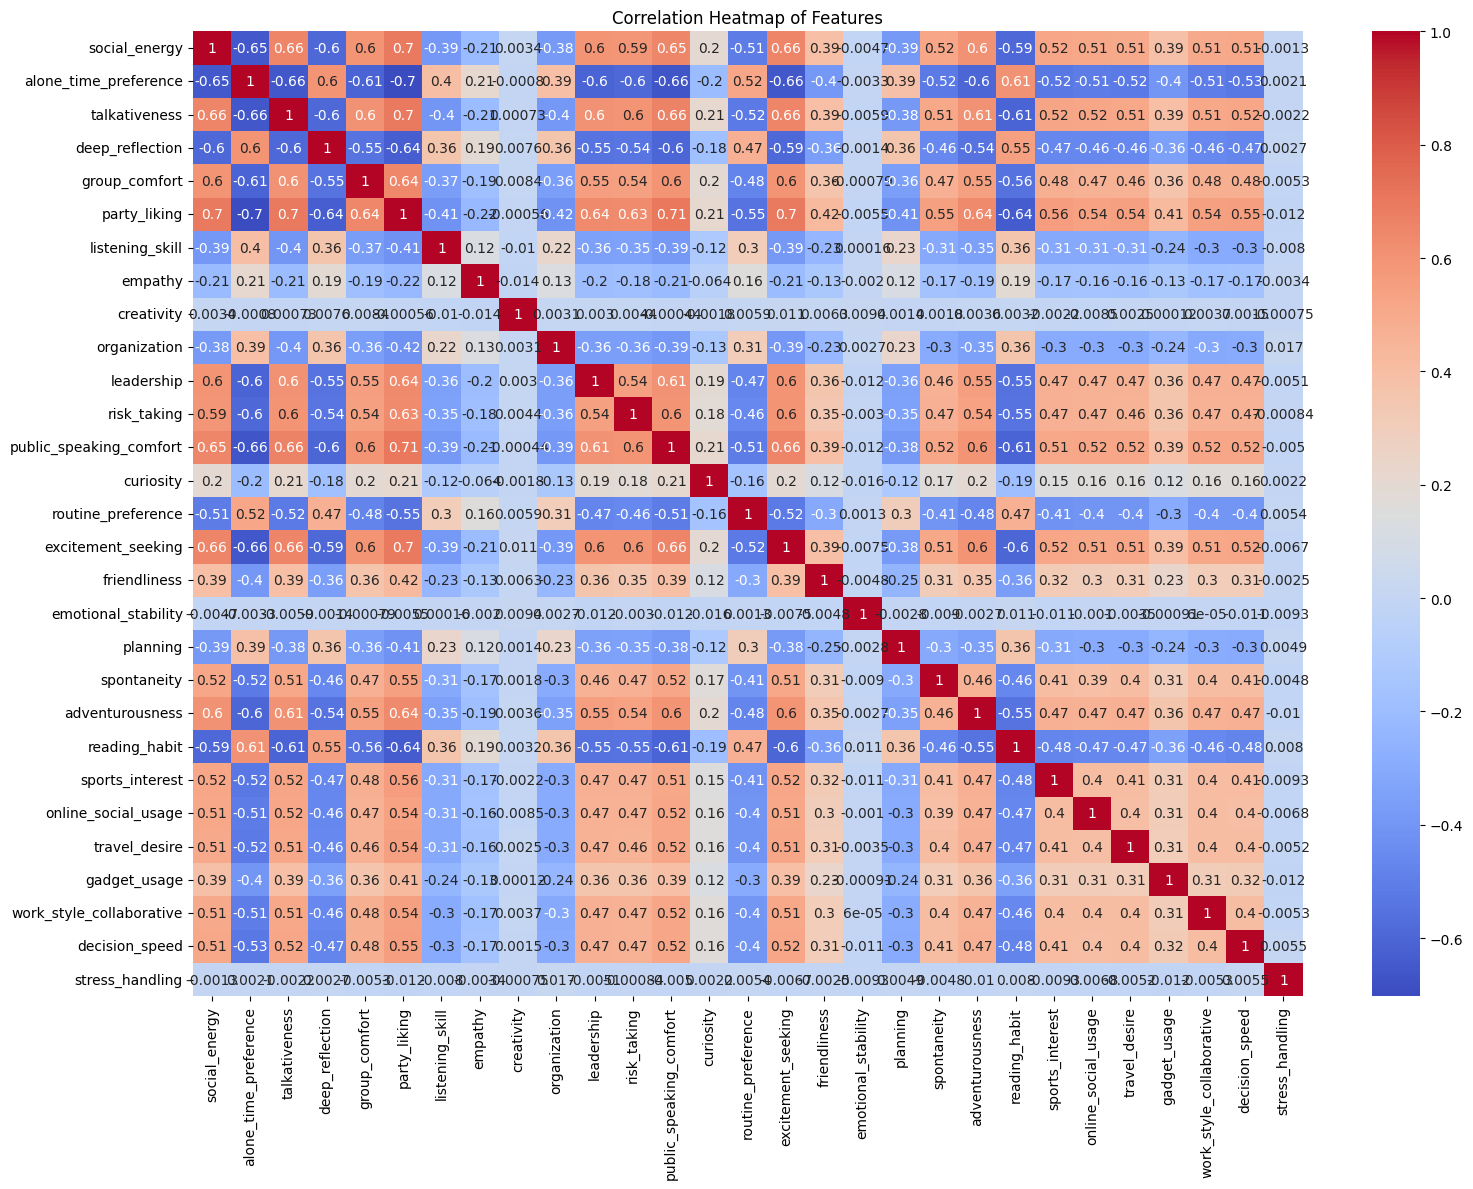

In [24]:
# Корреляция признаков
corr = df.drop(columns=["personality_type"]).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.savefig(FIGURES_DIR / f"Corr_heatmap", dpi=300, bbox_inches='tight')
plt.show()



In [25]:
top_pairs = (
    corr.where(~np.eye(corr.shape[0], dtype=bool))
        .unstack()
        .sort_values(ascending=False)
)

In [26]:
top_pairs 

public_speaking_comfort   party_liking                0.706269
party_liking              public_speaking_comfort     0.706269
talkativeness             party_liking                0.699113
party_liking              talkativeness               0.699113
                          excitement_seeking          0.698636
                                                        ...   
travel_desire             travel_desire                    NaN
gadget_usage              gadget_usage                     NaN
work_style_collaborative  work_style_collaborative         NaN
decision_speed            decision_speed                   NaN
stress_handling           stress_handling                  NaN
Length: 841, dtype: float64

### Исходя из матрицы кореляции можно наблюдать что есть четкая структура из двух противоположных "полюсов".  
### Социально-экстровертный кластер  сильно корелируют между собой public_speaking_comfort, talkativeness, excitement_seeking, social_energy (≈ 0.66–0.71). 
### Интроветрный полюс alone_time_preference, который отрицательно коррелирует почти со всеми из экстровертного полюса

### Вывод: Наблюдаеться Редундантность-многие “сильные” признаки измеряют почти одно и то же. Стоит расмотреть удаление некоторых признаков или групировку подробнее на этапе Отбора признаков

### Разабью признаки на тематические кластеры. Построю Radar chart для каждого кластера чтобы посотреть то как признаки формируют портреты типов

Социальность / коммуникация

social_energy, talkativeness, group_comfort, party_liking, friendliness, listening_skill, public_speaking_comfort, leadership

Саморегуляция / организация

organization, planning, routine_preference, decision_speed, work_style_collaborative

Эмоциональная устойчивость / эмпатия

emotional_stability, stress_handling, empathy

Открытость / поиск нового

curiosity, creativity, adventurousness, risk_taking, excitement_seeking, travel_desire, spontaneity

Интеллектуальные/поведенческие привычки

reading_habit, gadget_usage, online_social_usage, sports_interest

In [27]:
Social_features = ["social_energy", "talkativeness", "group_comfort", "party_liking", "friendliness", "listening_skill", "public_speaking_comfort", "leadership"]
Organizational_features = ["organization", "planning", "routine_preference", "decision_speed", "work_style_collaborative"]
Emotional_features = ["emotional_stability", "stress_handling", "empathy"]
Openness_features = ["curiosity", "creativity", "adventurousness", "risk_taking", "excitement_seeking", "travel_desire", "spontaneity"]
Intellectual_features = ["reading_habit", "gadget_usage", "online_social_usage", "sports_interest"]


groups = {
    "Social": Social_features,
    "Organizational": Organizational_features,
    "Emotional": Emotional_features,
    "Openness": Openness_features,
    "Intellectual": Intellectual_features
}


In [28]:
for group_name, features in groups.items():
    trait_cols = df[features]
    mean_trait = df.groupby("personality_type")[features].mean().reset_index()
    melted = mean_trait.melt(id_vars='personality_type', var_name='Trait', value_name='Average')

    fig = px.line_polar(melted, r='Average', theta='Trait', color='personality_type',
                        line_close=True, template='plotly_dark', title=f'{group_name} Personality Traits')
    fig.update_traces(fill='toself')
    fig.show()

n_components for 95% variance: 25
explained_variance_ratio sum: 0.9558183615408458


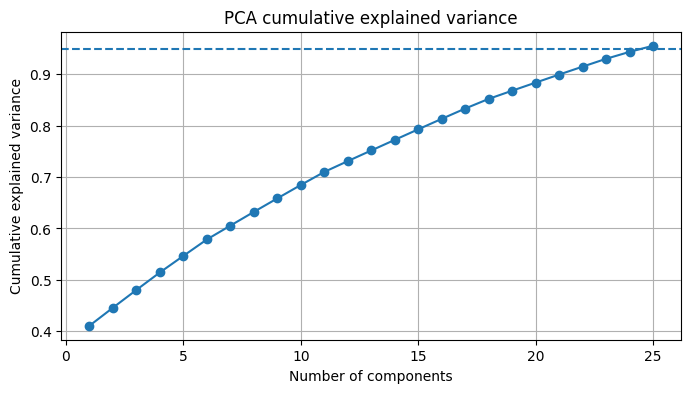

In [29]:
# X, y
target_col = "personality_type"
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

# стандартизация 
Xs = StandardScaler().fit_transform(X)
# PCA: сколько компонент нужно для 95% дисперсии
pca95 = PCA(n_components=0.95, random_state=42)
Z95 = pca95.fit_transform(Xs)

print("n_components for 95% variance:", pca95.n_components_)
print("explained_variance_ratio sum:", pca95.explained_variance_ratio_.sum())

# Scree / cumulative
cum = np.cumsum(pca95.explained_variance_ratio_)
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(cum)+1), cum, marker="o")
plt.axhline(0.95, linestyle="--")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA cumulative explained variance")
plt.grid(True)
plt.show()

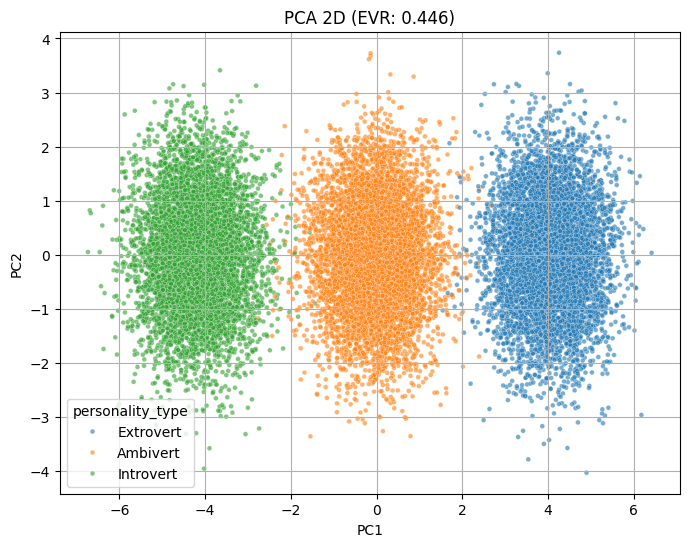

In [30]:
# PCA: 2D проекция для визуализации
pca2 = PCA(n_components=2, random_state=42)
Z2 = pca2.fit_transform(Xs)

pca_df = pd.DataFrame(Z2, columns=["PC1", "PC2"])
pca_df[target_col] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue=target_col, s=12, alpha=0.6)
plt.title(f"PCA 2D (EVR: {pca2.explained_variance_ratio_.sum():.3f})")
plt.grid(True)
plt.savefig(FIGURES_DIR / f"LDA.png", dpi=300, bbox_inches='tight')
plt.show()

### Анализ PCA показал, что для сохранения 95% общей дисперсии требуется относительно большое число компонент, что указывает на высокую многомерность признакового пространства и отсутствие доминирующих латентных факторов. Это согласуется с наблюдаемым перекрытием классов, в частности класса Ambivert, и объясняет сложность его разделения в низкоразмерных проекциях.